<a id='top'></a>

# Opta Data Engineering
##### Notebook to engineer [Opta data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/) Event data using [pandas](http://pandas.pydata.org/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 20/01/2022<br>
Notebook last updated: 01/02/2022

![Opta](../../img/logos/opta_sports_logo_small.png)

![Stats Perform](../../img/logos/stats_perform_logo_small.png)

![Watford F.C.](../../img/club_badges/premier_league/watford_fc_logo_small.png)

Click [here](#section4) to jump straight into the Data Engineering section and skip the [Notebook Brief](#section2) and [Data Sources](#section3) sections.

___


## <a id='introduction'>Introduction</a>
This notebook engineers a parsed F24 and F7 [Opta data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/) that have been provided by [Watford F.C](https://www.watfordfc.com/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

A static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/watford/blob/main/notebooks/2_data_engineering/Opta%20Data%20Engineering.ipynb). This notebook has an accompanying [`watford`](https://github.com/eddwebster/watford) GitHub repository and for my full repository of football analysis, see my [`football_analysis`](https://github.com/eddwebster/football_analytics) GitHub repository.

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Notebook Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Read in the Datasets](#section3.2)<br>
      3.    [Initial Data Handling](#section3.3)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
      2.    [Rename Columns](#section4.2)<br>
      3.    [Drop Duplicate Columns](#section4.3)<br>
      4.    [Sort the DataFrame](#section4.4)<br>
      3.    [Determine Each Player's Most Frequent Position](#section4.3)<br>
      6.    [Determine Each Player's Total Minutes Played](#section4.6)<br>
      7.    [Break Down All location Attributes](#section4.7)<br>
5.    [Summary](#section5)<br>
6.    [Next Steps](#section6)<br>
7.    [References](#section7)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing; and
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation.

All packages used for this notebook can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import chardet
import random
from io import BytesIO
from pathlib import Path

# Reading Directories
import glob
import os

# Working with JSON
import json
from pandas import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Requests and downloads
import tqdm
import requests

# Machine Learning
import scipy as sp
import scipy.spatial
from scipy.spatial import distance
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sk_metrics
from sklearn.metrics import log_loss, brier_score_loss, roc_auc_score , roc_curve, average_precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve, plot_calibration_curve
import pickle
from xgboost import XGBClassifier

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Print message
print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.19.1
pandas: 1.1.3
matplotlib: 3.3.1


### Defined Filepaths

In [3]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_second_spectrum = os.path.join(base_dir, 'data', 'second_spectrum')
data_dir_opta = os.path.join(base_dir, 'data', 'opta')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_second_spectrum = os.path.join(base_dir, 'scripts', 'second_spectrum')
scripts_dir_metrica_sports = os.path.join(base_dir, 'scripts', 'metrica_sports')
models_dir = os.path.join(base_dir, 'models')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')

### Create Directory Structure

In [4]:
"""
# Make the directory structure
for folder in ['combined', 'competitions', 'events', 'tactics', 'lineups', 'three-sixty']:
    path = os.path.join(data_dir, 'raw', folder)
    if not os.path.exists(path):
        os.mkdir(path)
"""

"\n# Make the directory structure\nfor folder in ['combined', 'competitions', 'events', 'tactics', 'lineups', 'three-sixty']:\n    path = os.path.join(data_dir, 'raw', folder)\n    if not os.path.exists(path):\n        os.mkdir(path)\n"

### Custom Functions

In [5]:
# ADD CODE HERE IF REQUIRED

### Notebook Settings

In [6]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

---

<a id='section2'></a>

## <a id='#section2'>2. Notebook Brief</a>
This notebook parses and engineers [Opta data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/) ... using [pandas](http://pandas.pydata.org/).


**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Introduction</a>
[Opta data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/) is...  football analytics, data provider ... 

F24 data is... F7 data is...

![Opta](../../img/logos/opta_sports_logo_small.png)

![Stats Perform](../../img/logos/stats_perform_logo_small.png)

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Import Data</a>
The following cells read in previously parsed `XML` files that have been saved as `CSV` files, using [FC.rSTATS](https://twitter.com/FC_rstats)'s `parse_f24` and `parse_f7` functions (see the following for more info [[link](http://www.fcrstats.com/fcrstats_package.html)]). These `CSV` files are read in as [pandas](https://pandas.pydata.org/) DataFrames.

<a id='section3.2.1'></a>

#### <a id='#section3.2.1'>3.2.1. F7 Files</a>
The each of the two parsed F7 data has been save into the following four files:
*    Game data
*    Players data
*    Goals data
*    Bookings data

Two matches are available. There are therefore are 8 F7 files to import in total.

In [7]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_opta, 'raw', 'F7/*.csv')))

['../../data/opta/raw/F7/srml-8-2021-f2210324-matchresults-bookings.csv', '../../data/opta/raw/F7/srml-8-2021-f2210324-matchresults-goals.csv', '../../data/opta/raw/F7/srml-8-2021-f2210334-matchresults-players.csv', '../../data/opta/raw/F7/srml-8-2021-f2210334-matchresults-bookings.csv', '../../data/opta/raw/F7/srml-8-2021-f2210324-matchresults-gamedata.csv', '../../data/opta/raw/F7/srml-8-2021-f2210334-matchresults-goals.csv', '../../data/opta/raw/F7/srml-8-2021-f2210324-matchresults-players.csv', '../../data/opta/raw/F7/srml-8-2021-f2210334-matchresults-gamedata.csv']


The two datasets provided are for the following matches:
*   [27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion](https://www.bbc.co.uk/sport/football/58620544) (f2210324)
*   [03/10/2021: Crystal Palace (2) vs. (2) Leicester City](https://www.bbc.co.uk/sport/football/58667896) (f2210334)

In [8]:
# Import CSV files as pandas DataFrames

## 27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion (f2210324)
df_cry_bri_game_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210324-matchresults-gamedata.csv'))
df_cry_bri_players_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210324-matchresults-players.csv'))
df_cry_bri_goals_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210324-matchresults-goals.csv'))
df_cry_bri_bookings_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210324-matchresults-bookings.csv'))

## 03/10/2021: Crystal Palace (2) vs. (2) Leicester City (f2210334)
df_cry_lei_game_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210334-matchresults-gamedata.csv'))
df_cry_lei_players_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210334-matchresults-players.csv'))
df_cry_lei_goals_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210334-matchresults-goals.csv'))
df_cry_lei_bookings_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F7', 'srml-8-2021-f2210334-matchresults-bookings.csv'))

<a id='section3.2.2'></a>

#### <a id='#section3.2.2'>3.2.2. F24 Files</a>
Each of the two matches has a single Event file. There are therefore 2 F24 files to import in total.

In [9]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_opta, 'raw', 'F24/*.csv')))

['../../data/opta/raw/F24/f24-8-2021-2210334-eventdetails.csv', '../../data/opta/raw/F24/f24-8-2021-2210324-eventdetails.csv']


In [10]:
# Import CSV files as pandas DataFrames

## 27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion (f2210324)
df_cry_bri_events_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F24', 'f24-8-2021-2210324-eventdetails.csv'))

## 03/10/2021: Crystal Palace (2) vs. (2) Leicester City (f2210334)
df_cry_lei_events_raw = pd.read_csv(os.path.join(data_dir_opta, 'raw', 'F24', 'f24-8-2021-2210334-eventdetails.csv'))

<a id='section3.3'></a>

### <a id='#section3.3'>3.3. Initial Data Handling</a>
To avoid duplication commands, this section just goes through the first of the two Event files, [Crystal Palace vs. Leicester City](https://www.bbc.co.uk/sport/football/58620544) (f2210334).

First check the quality of the dataset by looking first and last rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [11]:
# Display the first five rows of the DataFrame, df_cry_lei_events_raw
df_cry_lei_events_raw.head()

,Unnamed: 0,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,y,timestamp,last_modified,version,player_id,keypass,assist,1,102,103,107,108,123,124,127,13,130,131,139,140,141,144,145,146,147,15,152,153,154,155,156,157,167,168,17,170,173,174,177,178,179,18,180,182,183,185,189,194,196,197,199,2,20,209,21,210,211,212,213,214,215,22,223,224,225,227,228,229,230,231,233,236,237,24,240,241,25,250,255,256,257,259,265,279,285,286,287,29,292,293,294,295,3,30,302,31,328,346,347,363,374,375,376,377,378,383,384,385,386,387,388,389,391,392,393,395,396,397,399,4,406,41,42,44,458,46,47,49,5,53,55,56,57,59,6,63,64,65,7,72,73,74,75,76,78,80,81,82,83,88,89,94
0,1,2338644647,1,34,16,0,0,13,1,0.0,0.0,2021-10-03T13:00:03.370,2021-10-03T14:00:20,1633266020074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17745.0,NaN,4973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"17745, 166477, 40146, 197469, 218031, 93100, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1, 27, 5, 20, 4, 23, 37, 8, 9, 14, 7, 10, 11, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2338644677,1,34,16,0,0,31,1,0.0,0.0,2021-10-03T13:00:06.394,2021-10-03T13:54:21,1633265661489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66975.0,NaN,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40836, 55494, 244723, 66975, 174874, 209036, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"13, 2, 3, 4, 16, 6, 23, 18, 22, 9, 11, 1, 5, 7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2338696239,2,32,1,0,0,31,1,0.0,0.0,2021-10-03T14:00:24.495,2021-10-03T22:13:38,1633295617200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right to Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2338696245,2,32,1,0,0,13,1,0.0,0.0,2021-10-03T14:00:24.495,2021-10-03T22:13:39,1633295617265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left to Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2338696299,3,1,1,0,0,31,1,50.2,50.0,2021-10-03T14:00:24.576,2021-10-03T

In [12]:
# Display the last five rows of the DataFrame, df_cry_lei_events_raw
df_cry_lei_events_raw.tail()

,Unnamed: 0,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,y,timestamp,last_modified,version,player_id,keypass,assist,1,102,103,107,108,123,124,127,13,130,131,139,140,141,144,145,146,147,15,152,153,154,155,156,157,167,168,17,170,173,174,177,178,179,18,180,182,183,185,189,194,196,197,199,2,20,209,21,210,211,212,213,214,215,22,223,224,225,227,228,229,230,231,233,236,237,24,240,241,25,250,255,256,257,259,265,279,285,286,287,29,292,293,294,295,3,30,302,31,328,346,347,363,374,375,376,377,378,383,384,385,386,387,388,389,391,392,393,395,396,397,399,4,406,41,42,44,458,46,47,49,5,53,55,56,57,59,6,63,64,65,7,72,73,74,75,76,78,80,81,82,83,88,89,94
1960,1961,2339193269,1893,83,2,76,10,31,1,6.8,96.2,2021-10-03T15:35:16.117,2021-10-04T01:47:40,1633308458373,244723.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,1962,2339194665,1895,83,1,2,39,31,1,47.2,86.7,2021-10-03T14:03:04.304,2021-10-04T01:51:14,1633308673534,50471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,1963,2339197895,1289,1,2,76,2,13,1,92.0,22.2,2021-10-03T15:35:08.436,2021-10-04T02:03:55,1633309435556,219352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.9,34.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.8,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,1964,2339198193,1290,61,1,14,11,13,1,30.7,30.6,2021-10-03T14:14:36.345,2021-10-04T02:05:11,1633309511458,197469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,1965,2369553309,1896,24,16,0,0,31,1,0.0,0.0,2021-10-03T14:00:14.495,2021-12-22T16:08:01,1640189281031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,N

In [13]:
# Print the shape of the DataFrame, df_cry_lei_events_raw
print(df_cry_lei_events_raw.shape)

(1965, 162)


In [14]:
# Print the column names of the DataFrame, df_cry_lei_events_raw
print(df_cry_lei_events_raw.columns)

Index(['Unnamed: 0', 'id', 'event_id', 'type_id', 'period_id', 'min', 'sec',
       'team_id', 'outcome', 'x',
       ...
       '75', '76', '78', '80', '81', '82', '83', '88', '89', '94'],
      dtype='object', length=162)


In [15]:
# Data types of the features of the raw DataFrame, df_cry_lei_events_raw
df_cry_lei_events_raw.dtypes

Unnamed: 0      int64
id              int64
event_id        int64
type_id         int64
period_id       int64
               ...   
82            float64
83            float64
88            float64
89            float64
94            float64
Length: 162, dtype: object

Full details of these attributes and their data types is discussed further in the [Data Dictionary](section3.2.2).

In [16]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_cry_lei_events_raw.dtypes)

Unnamed: 0         int64
id                 int64
event_id           int64
type_id            int64
period_id          int64
min                int64
sec                int64
team_id            int64
outcome            int64
x                float64
y                float64
timestamp         object
last_modified     object
version            int64
player_id        float64
keypass          float64
assist           float64
1                float64
102              float64
103              float64
107              float64
108              float64
123              float64
124              float64
127               object
13               float64
130              float64
131               object
139              float64
140              float64
141              float64
144              float64
145              float64
146              float64
147              float64
15               float64
152              float64
153              float64
154              float64
155              float64


In [17]:
"""
# Print statements about the dataset

## Define variables for print statments
count_events = len(df_cry_lei_events)
count_shots = len(df_cry_lei_events[(df_cry_lei_events['type_name'] == 'Shot')])
count_goals = len(df_cry_lei_events[(df_cry_lei_events['type_name'] == 'Shot') & (df_cry_lei_events['shot_outcome_name'] == 'Goal')])
cols = list(df_cry_lei_events)
count_event_type = len(df_cry_lei_events['type_name'].unique())
vals_event_type = df_cry_lei_events['type_name'].unique()

## Print statements
print(f'The EURO 2020 Events DataFrame contains the data for {count_matches:,} matches, of which there are {count_events:,} total events.\n')
print(f'Of these events, there are {count_shots:,} shots ({round(100*count_shots/count_events,1)}%) and {count_goals:,} goals ({round(100*count_goals/count_events,1)}%).\n')
print(f'This translates to a shot to goal conversion percentage of {round(100*count_goals/count_shots, 1)}%.\n')
print(f'The dataset contains the following features: {cols}\n')
print(f'The \'event_type\' column contain {count_event_type:,} different values, including the following: {vals_event_type}\n')    
"""

"\n# Print statements about the dataset\n\n## Define variables for print statments\ncount_events = len(df_cry_lei_events)\ncount_shots = len(df_cry_lei_events[(df_cry_lei_events['type_name'] == 'Shot')])\ncount_goals = len(df_cry_lei_events[(df_cry_lei_events['type_name'] == 'Shot') & (df_cry_lei_events['shot_outcome_name'] == 'Goal')])\ncols = list(df_cry_lei_events)\ncount_event_type = len(df_cry_lei_events['type_name'].unique())\nvals_event_type = df_cry_lei_events['type_name'].unique()\n\n## Print statements\nprint(f'The EURO 2020 Events DataFrame contains the data for {count_matches:,} matches, of which there are {count_events:,} total events.\n')\nprint(f'Of these events, there are {count_shots:,} shots ({round(100*count_shots/count_events,1)}%) and {count_goals:,} goals ({round(100*count_goals/count_events,1)}%).\n')\nprint(f'This translates to a shot to goal conversion percentage of {round(100*count_goals/count_shots, 1)}%.\n')\nprint(f'The dataset contains the following featur

Counts of the event types:

In [18]:
# Shot outcomes types and their frequency
#df_cry_lei_events_raw.groupby(['type_name']).type_name.count()

There are eight outcomes of a shot: 'Blocked', 'Goal', 'Off T', 'Post', 'Saved', 'Saved Off Target', 'Saved to Post', 'Wayward'.

In [19]:
# Filter DataFrame for only shots and then groupby the 'typeName' (Event type) and count the number of each
#df_cry_lei_events_raw[(df_cry_lei_events['type_name'] == 'Shot')].groupby(['shot_type_name']).shot_type_name.count()

In [20]:
# Info for the raw DataFrame, df_cry_lei_events_raw
df_cry_lei_events_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Columns: 162 entries, Unnamed: 0 to 94
dtypes: float64(138), int64(10), object(14)
memory usage: 2.4+ MB


<AxesSubplot:>

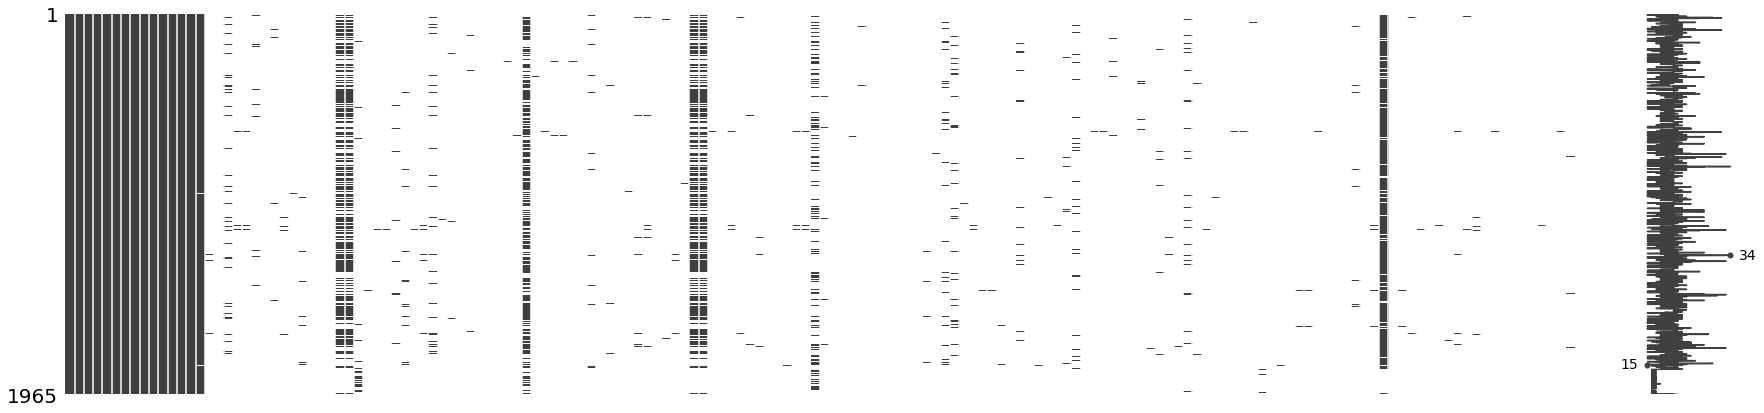

In [21]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_cry_lei_events_raw
msno.matrix(df_cry_lei_events_raw, figsize = (30, 7))

In [22]:
# Counts of missing values
null_value_stats = df_cry_lei_events_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

player_id      23
keypass      1948
assist       1964
1            1809
102          1938
             ... 
82           1958
83           1961
88           1964
89           1964
94           1958
Length: 148, dtype: int64

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
The next step is to wrangle the dataset to into a format that’s suitable for analysis.

This section is broken down into the following subsections:

4.01.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
4.02.    [Rename Columns](#section4.2)<br>
4.02.    [Drop Duplicate Columns](#section4.3)<br>
4.04.    [Sort the DataFrame](#section4.4)<br>
4.05.    [Determine Each Player's Most Frequent Position](#section4.5)<br>
4.06.    [Determine Each Player's Total Minutes Played](#section4.6)<br>
4.07.    [Break Down All location Attributes](#section4.7)<br>

<a id='section4.01'></a>

### <a id='#section4.01'>4.01. Assign Raw DataFrames to Engineered DataFrames</a>

In [23]:
# Import CSV files as pandas DataFrames

## F7 data

### 27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion (f2210324)
df_cry_bri_game = df_cry_bri_game_raw.copy()
df_cry_bri_players = df_cry_bri_players_raw.copy()
df_cry_bri_goals = df_cry_bri_goals_raw.copy()
df_cry_bri_bookings = df_cry_bri_bookings_raw.copy()

### 03/10/2021: Crystal Palace (2) vs. (2) Leicester City (f2210334)
df_cry_lei_game = df_cry_lei_game_raw.copy()
df_cry_lei_players = df_cry_lei_players_raw.copy()
df_cry_lei_goals = df_cry_lei_goals_raw.copy()
df_cry_lei_bookings = df_cry_lei_bookings_raw.copy()


## F24 data

### 27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion (f2210324)
df_cry_bri_events = df_cry_bri_events_raw.copy()

### 03/10/2021: Crystal Palace (2) vs. (2) Leicester City (f2210334)
df_cry_lei_events = df_cry_lei_events_raw.copy()

<a id='section4.02'></a>

### <a id='#section4.02'>4.02. Drop Columns</a>

In [24]:
#df_cry_bri_events = df_cry_bri_events.drop('Unnamed: 0', axis=1)
#df_cry_lei_events = df_cry_bri_events.drop('Unnamed: 0', axis=1)

<a id='section4.03'></a>

### <a id='#section4.03'>4.03. Sort DataFrames</a>
Sorting DataFrame into correct order of matches and their events by time and date. This is important as certain features created in the subsequent sections require logic that is dependent on proceeded and subsequent events and for these to be in the correct order.

In [25]:
# Sort DataFrame by 'matchDate', 'startTime', 'matchId', 'minute', 'second', 'eventId' 
#df_cry_bri_events = df_opta_events.sort_values(['startTime', 'matchId', 'minute', 'second', 'eventId'], ascending=[True, True, True, True, True])

<a id='section4.04'></a>

### <a id='#section4.04'>4.04. Clean Event Types Columns</a>
Specifically with the `type_id` attribute of the Event data, there are 74 different types (65 as per the Opta F24 Appendices documentation).

**Note:** there are 7 event types missing from the definitions list as they are not observed in the event data . The IDs of these Events are: 26, 29, 31, 33, 46, 48, 62.

For the event types that were available in the documentation and observed in the event data, they have the following Ids and definitions ((see the Opta F24 Appendices document [[link](https://github.com/eddwebster/football_analytics/blob/master/docs/opta/f24_appendices.docx)].

| No.       | `typeName`                          | `typeId`       | Definition                                    |
|-----------|-------------------------------------|----------------|-----------------------------------------------|
| 1.        | `Pass`                              | `1`            | Any pass attempted from one player to another – free kicks, corners, throw ins, goal kicks and goal assists    |
| 2.        | `Offside Pass`                      | `2`            | Attempted pass made to a player who is in an offside position    |
| 3.        | `Take On`                           | `3`            | Attempted dribble past an opponent (excluding when qualifier 211 is present as this is ‘overrun’ and is not always a duel event)    |
| 4.        | `Foul`                              | `4`            | This event is shown when a foul is committed resulting in a free kick    |
| 5.        | `Out`                               | `5`            | Shown each time the ball goes out of play for a throw-in or goal kick    |
| 6.        | `Corner Awarded`                    | `6`            | Ball goes out of play for a corner kick    |
| 7.        | `Tackle`                            | `7`            | Tackle = dispossesses an opponent of the ball - Outcome 1 = win & retain possession or out of play, 0 = win tackle but not possession    |
| 8.        | `Interception`                      | `8`            | When a player intercepts any pass event between opposition players and prevents the ball reaching its target. Cannot be a clearance.    |
| 9.        | `Turnover`                          | `9`            | Unforced error / loss of possession - i.e. bad control of ball – NO LONGER USED (Replaced with Unsuccessful Touch + Overrun)    |
| 10.        | `Save`                             | `10`            | Goalkeeper event; saving a shot on goal. Can also be an outfield player event with qualifier 94 for blocked shot    |
| 11.        | `Claim`                            | `11`            | Goalkeeper event; catching a crossed ball    |
| 12.        | `Clearance`                        | `12`            | Player under pressure hits the ball clear of the defensive zone or/and out of play    |
| 13.        | `MissedShots` or `Miss`            | `13`            | Any shot on goal which goes wide or over the goal    |
| 14.        | `ShotOnPost` or `Post`             | `14`            | Whenever the ball hits the frame of the goal    |
| 15.        | `SavedShot` or `Attempt Saved`     | `15`            | Shot saved - this event is for the player who made the shot. Qualifier 82 can be added for blocked shot.    |
| 16.        | `Goal`                             | `16`            | All goals    |
| 17.        | `Card`                             | `17`            | Bookings; will have red, yellow or 2nd yellow qualifier plus a reason    |
| 18.        | `SubstitutionOff` or`Player off`   | `18`            | Player is substituted off    |
| 19.        | `SubstitutionOn` or `Player on`    | `19`            | Player comes on as a substitute    |
| 20.        | `Player retired`                   | `20`            | Player is forced to leave the pitch due to injury and the team have no substitutions left    |
| 21.        | `Player returns`                   | `21`            | Player comes back on the pitch    |
| 22.        | `Player becomes goalkeeper`        | `22`            | When an outfield player has to replace the goalkeeper    |
| 23.        | `Goalkeeper becomes player`        | `23`            | If goalkeeper becomes an outfield player    |
| 24.        | `Condition change`                 | `24`            | Change in playing conditions    |
| 25.        | `Official change`                  | `25`            | Referee or linesman is replaced    |
| 26.        |                                    | `26`            |        |
| 27.        | `Start delay`                      | `27`            | Used when there is a stoppage in play such as a player injury    |
| 28.        | `End delay`                        | `28`            | Used when the stoppage ends and play resumes    |
| 29.        |                                    |                 |        |
| 30.        | `End`                              | `30`            | End of a match period    |
| 31.        |                                    |                 |        |
| 32.        | `Start`                            | `32`            | Start of a match period    |
| 33.        |                                    |                 |        |
| 34.        | `FormationSet` or `Team set up`    | `34`            | Team line up; qualifiers 30, 44, 59, 130, 131 will show player line up and formation    |
| 35.        | `Player changed position`          | `35`            | Player moved to a different position but the team formation remained the same    |
| 36.        | `Player changed Jersey number`     | `36`            | Player is forced to change jersey number, qualifier will show the new number    |
| 37.        | `Collection End`                   | `37`            | Event 30 signals end of half. This signals end of the match and thus data collection.    |
| 38.        | `Temp_Goal`                        | `38`            | Goal has occurred but it is pending additional detail qualifiers from Opta. Will change to event 16.    |
| 39.        | `Temp_Attempt`                     | `39`            | Shot on goal has occurred but is pending additional detail qualifiers from Opta. Will change to event 15.    |
| 40.        | `FormationChange` or `Formation change`      | `40`            | Team alters its formation    |
| 41.        | `Punch`                            | `41`            | Goalkeeper event; ball is punched clear    |
| 42.        | `GoodSkill` or `Good Skill`        | `42`            | A player shows a good piece of skill on the ball Ð such as a step over or turn on the ball Ð NO LONGER USED    |
| 43.        | `Deleted event`                    | `43`            | Event has been deleted Ð the event will remain as it was originally with the same ID but will be resent with the type altered to 43.    |
| 44.        | `Aerial`                           | `44`            | Aerial duel Ð 50/50 when the ball is in the air Ð outcome will represent whether the duel was won or lost    |
| 45.        | `Challenge`                        | `45`            | When a player fails to win the ball as an opponent successfully dribbles past them    |
| 46.        |                                    |                 |        |
| 47.        | `Rescinded card`                   | `47`            | This can occur post match if the referee rescinds a card he has awarded    |
| 48.        |                                    | `48`            |        |
| 49.        | `BallRecovery` or `Ball recovery`                    | `49`            | Team wins the possession of the ball and successfully keeps possession for at least two passes or an attacking play    |
| 50.        | `Dispossessed`                     | `50`            | Player is successfully tackled and loses possession of the ball    |
| 51.        | `Error`                            | `51`            | Mistake by player losing the ball. Leads to a shot or goals as described with qualifier 169 or 170    |
| 52.        | `KeeperPickup` or `Keeper pick-up`                   | `52`            | Goalkeeper event; picks up the ball    |
| 53.        | `CrossNotClaimed` or `Cross not claimed`                | `53`            | Goalkeeper event; cross not successfully caught    |
| 54.        | `Smother`                          | `54`            | Goalkeeper event; comes out and covers the ball in the box winning possession    |
| 55.        | `OffsideProvoked` or `Offside provoked`                 | `55`            | Awarded to last defender when an offside decision is given against an attacker    |
| 56.        | `ShieldBallOpp` or `Shield ball opp`                  | `56`            | Defender uses his body to shield the ball from an opponent as it rolls out of play    |
| 57.        | `Foul throw-in`                    | `57`            | A throw-in not taken correctly resulting in the throw being awarded to the opposing team    |
| 58.        | `PenaltyFaced` or `Penalty faced`     | `58`            | Goalkeeper event; penalty by opposition team    |
| 59.        | `KeeperSweeper` or `Keeper Sweeper`     | `59`            | When keeper comes off his line and/or out of his box to clear the ball    |
| 60.        | `ChanceMissed` or `Chance missed`  | `60`            | Used when a player does not actually make a shot on goal but was in a good position to score and on`ly just missed receiving a pass    |
| 61.        | `BallTouch` or `Ball touch`        | `61            | Used when a player makes a bad touch on the ball and loses possession. Outcome 1 Ð ball simply hit the player unintentionally. Outcome 0 Ð Player unsuccessfully controlled the ball.    |
| 62.        |                                    |                 |        |
| 63.        | `Temp_Save`                        | `63`            | An event indicating a save has occurred but without full details. Event 10 will follow shortly afterwards with full details.    |
| 64.        | `Resume`                           | `64`            | Match resumes on a new date after being abandoned mid game.    |
| 65.        | `Contentious referee decision`     | `65`            | Any major talking point or error made by the referee Ð decision will be assigned to the relevant team    |
| 66.        | `Possession Data`                  | `66`            | Possession event will appear every 5 mins    |
| 67.        | `50/50`                            | `67`            | 	New duel - 2 players running for a loose ball - GERMAN ONLY. Outcome 1 or 0.    |
| 68.        | `Referee Drop Ball`                | `68`            | Delay - ref stops - this to event given to both teams on restart. No Outcome    |
| 69.        | `Failed to Block`                  | `69`            | New duel (put through-Q266 is the winning duel event). Attempt to block a shot or pass - challenge lost    |
| 70.        | `Injury Time Announcement`         | `70`            | Injury Time awarded by Referee    |
| 71.        | `Coach Setup`                      | `71`            | Coach Type; 1,2,18,30,32,54,57,58,59    |
| 72.        | `Caught Offside`                   | `72`            | 	New event to just show player who is offside instead of offside pass event    |
| 73.        | `Other Ball Contact`               | `73`            | This is an automated extra event for DFL. It comes with a tackle or an interception and indicates if the player who made the tackle/interception retained the ball after this action or if the tackle/interception was a single ball touch (other ball contact with type “interception”, type “Defensive Clearance” or type “ TackleRetainedBall).    |
| 74.        | `Blocked Pass`                     | `74`            | Defender is close to player in possession and blocks a pass. Different from interception which is where the player has moved to intercept.    |
| 75.        | `Delayed Start`                    | `75`            | Match start delayed     |
| 76.        | `Early end`                        | `76`            | The match has had an early end     |
| 77.        | `Player Off Pitch`                 | `77`            | Event indicating that a player is now off the pitch     |
| 80.        | `Unknown`                          | `80`            |      |
| 83.        | `Unknown`                          | `83`            |      |

In [26]:
df_cry_lei_events['type_id'].unique()

array([34, 32,  1, 49,  5, 61,  4, 12,  6, 13, 44, 43, 74, 52,  7, 55,  2,
       10, 15,  3, 45,  8, 50, 27, 28, 17, 16, 51, 11, 42, 30, 14, 18, 19,
       37, 80, 83, 67, 24])

In [27]:
# Define function to 
def clean_event_names(df):
    
    """
    Function to...
    """
    
    ## Read in the reference dataset of Event Types as a pandas DataFrame
    df_event_types_ref = pd.read_csv(os.path.join(data_dir_opta, 'reference', 'opta_event_types.csv'))


    ## Prepare DataFrame to create dictionary

    ### Remove Null values
    df_event_types_ref = df_event_types_ref[df_event_types_ref['eventTypeId'].notna()]

    ### Convert data types
    df_event_types_ref['eventTypeId'] = df_event_types_ref['eventTypeId'].astype(int)
    #df_event_types_ref['eventTypeId'] = 'isEventType_' + df_event_types_ref['eventTypeId'].astype(str)

    ### 
    df_event_types_ref['eventTypeName'] = df_event_types_ref['eventTypeName'].str.title().str.replace(' ', '').str.replace('/', '').str.replace('-', '')
    df_event_types_ref['eventTypeName'] = 'is' + df_event_types_ref['eventTypeName'].astype(str)


    ## Create a dictionary of Event IDs and Event Names from the reference dataset
    dict_event_types = dict(zip(df_event_types_ref['eventTypeId'], df_event_types_ref['eventTypeName']))
    
    
    ## Map Event Names to Type IDs
    df['event_name'] = df['type_id'].map(dict_event_types)
    
    
    ## Return DataFrame
    return df

In [28]:
# Apply Clean Event Types column function
df_cry_lei_events = clean_event_names(df_cry_lei_events)
df_cry_bri_events = clean_event_names(df_cry_bri_events)

Now that the Event Types column has been cleaned, the next stage is to clean up the Qualifier types.

<a id='section4.05'></a>

### <a id='#section4.05'>4.05. Clean Qualifier Types Columns</a>
There are 229 different qualifiers with the following Ids and definitions (see the Opta F24 Appendices document [[link](https://github.com/eddwebster/football_analytics/blob/master/docs/opta/f24_appendices.docx)]). Also see the definitions on the Stats Perform website [[link](https://www.statsperform.com/opta-event-definitions/)])

**Note:** these Qualifier Types are not to be confused with the 219 Satisified Event Types (see below), that are available in the JSON string extracted from [WhoScored!](https://www.whoscored.com/).

**Note:** there are 19 qualifier types missing from the definitions list as they are not observed in the event data. The IDs of these Events are: 27, 43, 52, 58, 98, 99, 104, 105, 125, 126, 129, 142, 143, 148, 149, 150, 151, 152, 193.


| No.      | `qualifierTypeName`               | `qualifierTypeId`     | Values                        | Definition                                                                                                                                 | Qualifier Category             | Associated Event Type (`typeName`)      |
|----------|-----------------------------------|-----------------------|-------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------|-----------------------------------------|
| 1.       | `Long ball`                       | `1`                   |                               | Long pass over 35 yards                                                                                                                    | Pass Events                    | 1                                       |
| 2.       | `Cross`                           | `2`                   |                               | A ball played in from wide areas into the box                                                                                              | Pass Events                    | 1                                       |
| 3.       | `Head pass`                       | `3`                   |                               | Pass made with a players head                                                                                                              | Pass Events                    | 1                                       |
| 4.       | `Through ball`                    | `4`                   |                               | Ball played through for player making an attacking run to create a chance on goal                                                          | Pass Events                    | 1                                       |
| 5.       | `Free kick taken`                 | `5`                   |                               | Any free kick; direct or indirect                                                                                                          | Pass Events                    | 1                                       |
| 6.       | `Corner taken`                    | `6`                   |                               | All corners. Look for qualifier 6 but excluding qualifier 2 for short corners                                                              | Pass Events                    | 1                                       |
| 7.       | `Players caught offside`          | `7`                   | Player ID                     | Player who was in an offside position when pass was made.                                                                                  | Pass Events                    | 1                                       |
| 8.       | `Goal disallowed`                 | `8`                   |                               | Pass led to a goal disallowed for a foul or offside                                                                                        | Pass Events                    | 1                                       |
| 9.       | `Penalty`                         | `9`                   |                               | When attempt on goal was a penalty kick. ALSO used on Event type 4 to indicate a penalty was awarded                                       | Shot Descriptors               | 13, 14, 15, 16                          |
| 10.      | `Hand`                            | `10`                  |                               | Handball                                                                                                                                   | Foul & Card Events             | 4                                       |
| 11.      | `6-seconds violation`             | `11`                  |                               | Goalkeeper held onto the ball longer than 6 seconds resulting in a free kick                                                               | Foul & Card Events             | 4                                       |
| 12.      | `Dangerous play`                  | `12`                  |                               | A foul due to dangerous play                                                                                                               | Foul & Card Events             | 4                                       |
| 13.      | `Foul`                            | `13`                  |                               | All fouls                                                                                                                                  | Foul & Card Events             | 4                                       |
| 14.      | `Last line`                       | `14`                  |                               | When a player makes a defensive action and they are the last person between the opponent and the goal                                      | Defensive Events               |                                         |
| 15.      | `Head`                            | `15`                  |                               | Any event where the player used their head such as a shot or a clearance                                                                   | Body Part                      |                                         |
| 16.      | `Small box-centre`                | `16`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 17.      | `Box-centre`                      | `17`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 18.      | `Out of box-centre`               | `18`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 19.      | `35+ centre`                      | `19`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 20.      | `Right footed`                    | `20`                  |                               | Player shot with right footed                                                                                                              | Body Part                      |                                         |
| 21.      | `Other body part`                 | `21`                  |                               | Shot was neither via a player’s head or foot for example knee or chest                                                                     | Body Part                      |                                         |
| 22.      | `Regular play`                    | `22`                  |                               | Shot during open play as opposed to from a set play                                                                                        | Pattern of Play                | 13, 14, 15, 16                          |
| 23.      | `Fast break`                      | `23`                  |                               | Shot occurred following a fast break situation                                                                                             | Pattern of Play                | 13, 14, 15, 16                          |
| 24.      | `Set piece`                       | `24`                  |                               | Shot occurred from a crossed free kick                                                                                                     | Pattern of Play                | 13, 14, 15, 16                          |
| 25.      | `From corner`                     | `25`                  |                               | Shot occurred from a corner                                                                                                                | Pattern of Play                | 13, 14, 15, 16                          |
| 26.      | `Free kick`                       | `26`                  |                               | Shot occurred directly from a free kick                                                                                                    | Pattern of Play                | 13, 14, 15, 16                          |
| 27.      |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 28.      | `own goal`                        | `28`                  |                               | Own goal. Note: Use the inverse coordinates of the goal location                                                                           | Shot Descriptors               | 13, 14, 15, 16                          |
| 29.      | `Assisted`                        | `29`                  |                               | Indicates that there was a pass (assist) from another player to set up the goal opportunity                                                | Line Up / Subs / Formation     | 13, 14, 15, 16                          |
| 30.      | `Involved`                        | `30`                  |                               | Player ID's in line up                                                                                                                     | Foul & Card Events             | 32, 34, 35, 36, 40                      |
| 31.      | `Yellow Card`                     | `31`                  |                               | Player shown a yellow card                                                                                                                 | Foul & Card Events             |                                         |
| 32.      | `Second yellow`                   | `32`                  |                               | Player receives a 2nd yellow card which automatically results in a red card                                                                | Foul & Card Events             |                                         |
| 33.      | `Red Card`                        | `33`                  |                               | Player shown a straight red card                                                                                                           | Foul & Card Events             |                                         |
| 34.      | `Referee abuse`                   | `34`                  |                               | Card shown to player because of abuse to the referee                                                                                       | Foul & Card Events             | 4                                       |
| 35.      | `Argument`                        | `35`                  |                               | Card shown to player because of an argument                                                                                                | Foul & Card Events             | 4                                       |
| 36.      | `Fight`                           | `36`                  |                               | Card shown to player because of their involvement in a fight                                                                               | Foul & Card Events             | 4                                       |
| 37.      | `Time wasting`                    | `37`                  |                               | Card shown to player for time wasting                                                                                                      | Foul & Card Events             | 4                                       |
| 38.      | `Excessive celebration`           | `38`                  |                               | Card shown to player for excessively celebrating a goal                                                                                    | Foul & Card Events             | 4                                       |
| 39.      | `Crowd interaction`               | `39`                  |                               | Card shown to player because of contact or communication with the crowd                                                                    | Foul & Card Events             | 4                                       |
| 40.      | `Other reason`                    | `40`                  |                               | Card shown for unknown reason                                                                                                              | Foul & Card Events             | 4                                       |
| 41.      | `Injury`                          | `41`                  |                               | Substitution, event 18, because of injury                                                                                                  | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 42.      | `Tactical`                        | `42`                  |                               | Substitution, event 18 for tactical reasons                                                                                                | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 43.      |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 44.      | `Player Position`                 | `44`                  | Dynamic                       | Goalkeeper, Defender, Midfielder, Forward or Substitute. These are the default / natural positions associated with each player and not necessarily the position they played in the match; see qualifier 131 for this.                           | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                     |
| 45.      | `Temperature`                     | `45`                  |                               | ...                                                                                                                                        | ...                            |                                         |
| 46.      | `Conditions`                      | `46`                  |                               | ...                                                                                                                                        | ...                            |                                         |
| 47.      | `Field Pitch`                     | `47`                  |                               | ...                                                                                                                                        | ...                            |                                         |
| 48.      | `Lightings`                       | `48`                  |                               | ...                                                                                                                                        | ...                            |                                         |
| 49.      | `Attendance figure`               | `49`                  | Dynamic                       | Number of people in the crowd                                                                                                              | Attendance                     |                                         |
| 50.      | `Official position`               | `50`                  | 1, 2, 3, 4                    | Referee, Linesman#1, Linesman#2, Forth official                                                                                            | Referee                        |                                         |
| 51.      | `Official Id`                     | `51`                  | Official ID                   | Unique ID for the official                                                                                                                 | Referee                        |                                         |
| 52.      |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 53.      | `Injured player id`               | `53`                  | ID of player injured          | ID of the player who is injured and causing a delay in the game                                                                            | Stoppages                      | 27                                      |
| 54.      | `End cause`                       | `54`                  | 1,2,3,4,5,6,7,99,100          | Golden goal, weather, crowd, insufficient players, floodlight failure, frozen pitch, waterlogged pitch, other, unknown                     | General                        |                                         |
| 55.      | `Related event ID`                | `55`                  | Event_id                      | This will appear for goals or shots, the related event_id will be that of the assist and thus show the assisting player ID                 | Pattern of Play                | 13, 14, 15, 16                          |
| 56.      | `Zone`                            | `56`                  | Back, left, centre, right     | Area on the pitch - see appendix 7                                                                                                         | General                        |                                         |
| 57.      | `End type`                        | `57`                  | End of the match              | This will be shown for substitutions, line ups, line up changes                                                                            | General                        |                                         |
| 58.      |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 59.      | `Jersey Number`                   | `59`                  | Shirt number of player(s)     | This will be shown for substitutions, line ups, line up changes                                                                            | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 60.      | `Small box-right`                 | `60`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 61.      | `Small box-left`                  | `61`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 62.      | `Box-deep right`                  | `62`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 63.      | `Box-right`                       | `63`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 64.      | `Box-left`                        | `64`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 65.      | `Box-deep left`                   | `65`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 66.      | `Out of box-deep right`           | `66`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 67.      | `Out of box-right`                | `67`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 68.      | `Out of box-left`                 | `68`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 69.      | `Out of box-deep left`            | `69`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 70.      | `35+ right`                       | `70`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 71.      | `35+ left`                        | `71`                  |                               | Zone of the pitch - See appendix 7                                                                                                         | Shot Location Descriptors      |                                         |
| 72.      | `Left footed`                     | `72`                  |                               | Player shot with their left foot                                                                                                           | Body Part                      |                                         |
| 73.      | `Left`                            | `73`                  |                               | Hit the left post or missed left                                                                                                           | Shot Location Descriptors      |                                         |
| 74.      | `High`                            | `74`                  |                               | Hit crossbar or missed over                                                                                                                | Shot Location Descriptors      |                                         |
| 75.      | `Right`                           | `75`                  |                               | Hit right post or missed right                                                                                                             | Shot Location Descriptors      |                                         |
| 76.      | `Low Left`                        | `76`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 77.      | `High Left`                       | `77`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 78.      | `Low Centre`                      | `78`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 79.      | `High Centre`                     | `79`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 80.      | `Low Right`                       | `80`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 81.      | `High Right`                      | `81`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 82.      | `Blocked`                         | `82`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 83.      | `Close Left`                      | `83`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 84.      | `Close Right`                     | `84`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 85.      | `Close High`                      | `85`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 86.      | `Close Left and High`             | `86`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 87.      | `Close Right and High`            | `87`                  |                               | Zone of the goalmouth - See appendix 6                                                                                                     | Shot Location Descriptors      |                                         |
| 88.      | `High claim`                      | `88`                  |                               | Event 11 Claim - Goalkeeper claims possession of a crossed ball                                                                            | Goalkeeper Events              | 10, 11, 12                              |
| 89.      | `1 on 1`                          | `89`                  |                               | Event 10 Save; when attacker was clear with no defenders between him and the goalkeeper                                                    | Goalkeeper Events              | 10, 11, 12                              |
| 90.      | `Deflected save`                  | `90`                  |                               | Event 10 Save; when goalkeeper saves a shot but does not catch the ball                                                                    | Goalkeeper Events              | 10, 11, 12                              |
| 91.      | `Dive and deflect`                | `91`                  |                               | Event 10 Save; when goalkeeper saves a shot while diving but does not catch the ball                                                       | Goalkeeper Events              | 10, 11, 12                              |
| 92.      | `Catch`                           | `92`                  |                               | Event 10 Save; when goalkeeper saves a shot and catches it                                                                                 | Goalkeeper Events              | 10, 11, 12                              |
| 93.      | `Dive and catch`                  | `93`                  |                               | Event 10 Save; when goalkeeper saves a shot while diving and catches it                                                                    | Goalkeeper Events              | 10, 11, 12                              |
| 94.      | `Def block`                       | `94`                  |                               | Defender blocks an opposition shot. Shown with event 10.                                                                                   | Defensive Events               |                                         |
| 95.      | `Back pass`                       | `95`                  |                               | Free kick given for an illegal pass to the goalkeeper which was collected by his hands or picked up                                        | Foul & Card Events             | 4                                       |
| 96.      | `Corner situation`                | `96`                  |                               | Pass or shot event in corner situation. 25 is used when the goal is direct from corner, 96 relates to 2nd phase attack.                    | Pattern of Play                | 13, 14, 15, 16                          |
| 97.      | `Direct free`                     | `97`                  |                               | 26 will be used for shot directly from a free kick. 97 only used with Opta GoalData (game system 4) but not with full data.                | Pattern of Play                | 13, 14, 15, 16                          |
| 98.      |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 99.      |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 100.     | `Six Yard Blocked`                | `100`                 |                               | Shot blocked on the 6 yard line                                                                                                            | Shot Location Descriptors      |                                         |
| 101.     | `Saved Off Line`                  | `101`                 |                               | Shot saved on the goal line                                                                                                                | Shot Location Descriptors      |                                         |
| 102.     | `Goal Mouth Y Coordinate`         | `102`                 | 0-100                         | Y Co-ordinate of where a shot crossed goal line - see Appendix 4                                                                           | Shot Location Descriptors      |                                         |
| 103.     | `Goal Mouth Z Coordinate`         | `103`                 | 0-100                         | Z Co-ordinate for height at which a shot crossed the goal line - see Appendix 4                                                            | Shot Location Descriptors      |                                         |
| 104.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 105.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 106.     | `Attacking Pass`                  | `106`                 |                               | A pass in the opposition’s half of the pitch                                                                                               | Pass Events                    | 1                                       |
| 107.     | `Throw In`                        | `107`                 |                               | Throw-in taken                                                                                                                             | Pass Events                    | 1                                       |
| 108.     | `Volley`                          | `108`                 |                               |                                                                                                                                            | ...                            |                                         |
| 109.     | `Overhead`                        | `109`                 |                               |                                                                                                                                            | ...                            |                                         |
| 110.     | `Half Volley`                     | `110`                 |                               |                                                                                                                                            | ...                            |                                         |
| 111.     | `Diving Header`                   | `111`                 |                               |                                                                                                                                            | ...                            |                                         |
| 112.     | `Scramble`                        | `112`                 |                               | Goal where there was a scramble for possession of the ball and the defence had an opportunity to clear                                     | Pattern of Play                | 13, 14, 15, 16                          |
| 113.     | `Strong`                          | `113`                 |                               | Shot was subjectively classed as strong                                                                                                    | Shot Descriptors               | 13, 14, 15, 16                          |
| 114.     | `Weak`                            | `114`                 |                               | Shot was subjectively classed as weak                                                                                                      | Shot Descriptors               | 13, 14, 15, 16                          |
| 115.     | `Rising`                          | `115`                 |                               | Shot was rising in the air                                                                                                                 | Shot Descriptors               | 13, 14, 15, 16                          |
| 116.     | `Dipping`                         | `116`                 |                               | Shot was dipping towards the ground                                                                                                        | Shot Descriptors               | 13, 14, 15, 16                          |
| 117.     | `Lob`                             | `117`                 |                               | Shot was an attempt by the attacker to play the ball over the goalkeeper and into the goal                                                 | Shot Descriptors               | 13, 14, 15, 16                          |
| 118.     | `One Bounce`                      | `118`                 |                               |                                                                                                                                            | Shot Descriptors               | 13, 14, 15, 16                          |
| 119.     | `Few Bounces`                     | `119`                 |                               |                                                                                                                                            | Shot Descriptors               | 13, 14, 15, 16                          |
| 120.     | `Swerve Left`                     | `120`                 |                               | Shot which swerves to the left - from attackers perspective                                                                                | Shot Descriptors               | 13, 14, 15, 16                          |
| 121.     | `Swerve Right`                    | `121`                 |                               | Shot which swerves to the right - from attackers perspective                                                                               | Shot Descriptors               | 13, 14, 15, 16                          |
| 122.     | `Swerve Moving`                   | `122`                 |                               | Shot which swerves in several directions                                                                                                   | Shot Descriptors               | 13, 14, 15, 16                          |
| 123.     | `Keeper Throw`                    | `123`                 |                               | Pass event - goalkeeper throws the ball out                                                                                                | Goalkeeper Events              | 10, 11, 12                              |
| 124.     | `Goal Kick`                       | `124`                 |                               | Pass event – goal kick                                                                                                                     | Goalkeeper Events              | 10, 11, 12                              |
| 125.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 126.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 127.     | `Direction of play`               | `127`                 | Right to Left                 | Event type 32 - Actual direction of play in relation to TV camera. X/Y coordinates however are ALWAYS all normalized to Left to Right.     | General                        |                                         |
| 128.     |  `Punch`                          | `128`                 |                               | Clearance by goalkeeper where he punches the ball clear                                                                                    | Goalkeeper Events              | 10, 11, 12                              |
| 129.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 130.     | `Team Formation`                  | `130`                 | Formation ID                  | See appendix 8                                                                                                                             | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 131.     | `Team Player Formation`           | `131`                 | 1 to 11                       | Player position within a formation - 'See appendix 8                                                                                       | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 132.     | `Dive`                            | `132`                 |                               | Free kick or card event; player penalised for simulation                                                                                   | Foul & Card Events             | 4                                       |
| 133.     | `Deflection`                      | `133`                 |                               | Shot deflected off another player                                                                                                          | Shot Descriptors               | 13, 14, 15, 16                          |
| 134.     | `Far Wide Left`                   | `134`                 |                               |                                                                                                                                            | ...                            |                                         |
| 135.     | `Far Wide Right`                  | `135`                 |                               |                                                                                                                                            | ...                            |                                         |
| 136.     | `Keeper Touched`                  | `136`                 |                               | Goal where the goalkeeper got a touch on the ball as it went in                                                                            | Shot Descriptors               | 13, 14, 15, 16                          |
| 137.     | `Keeper Saved`                    | `137`                 |                               | Shot going wide or over the goal but still collected/saved by the goalkeeper with event type 15                                            | Shot Descriptors               | 13, 14, 15, 16                          |
| 138.     | `Hit Woodwork`                    | `138`                 |                               | Any shot which hits the post or crossbar                                                                                                   | Shot Descriptors               | 13, 14, 15, 16                          |
| 139.     | `Own Player`                      | `139`                 |                               | Shot saved by goalkeeper that was deflected by a defender                                                                                  | Goalkeeper Events              | 13, 14, 15, 16                          |
| 140.     | `Pass End X`                      | `140`                 | 0-100                         | The x pitch coordinate for the end point of a pass - See Appendix 5                                                                        | Pass Events                    | 1                                       |
| 141.     | `Pass End Y`                      | `141`                 | 0-100                         | The y pitch coordinate for the end point of a pass - See Appendix 5                                                                        | Pass Events                    | 1                                       |
| 142.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 143.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 144.     | `Deleted Event Type`              | `144`                 | Event ID                      | An event which should be removed. Value will show the ID of this event                                                                     | General                        |                                         |
| 145.     | `Formation slot`                  | `145`                 | 1 to 11                       | Formation position of a player coming on - see appendix 8                                                                                  | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 146.     | `Blocked X Coordinate`            | `146`                 | 0-100                         | The x pitch coordinate for where a shot was blocked                                                                                        | Shot Location Descriptors      |                                         |
| 147.     | `Blocked Y Coordinate`            | `147`                 | 0-100                         | The y pitch coordinate for where a shot was blocked                                                                                        | Shot Location Descriptors      |                                         |
| 148.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 149.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 150.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 151.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 152.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 153.     | `Not past goal line`              | `153`                 |                               | Shot missed which does not  pass the goal line                                                                                             | Shot Descriptors               | 13, 14, 15, 16                          |
| 154.     | `Intentional Assist`              | `154`                 |                               | Shot from an intentional assist i.e. The assisting player intended the pass, no deflection etc                                             | Pattern of Play                | 13, 14, 15, 16                          |
| 155.     | `Chipped`                         | `155`                 |                               | Pass which was chipped into the air                                                                                                        | Pass Events                    | 1                                       |
| 156.     | `Lay-off`                         | `156`                 |                               | Pass where player laid the ball into the path of a teammates run                                                                           | Pass Events                    | 1                                       |
| 157.     | `Launch`                          | `157`                 |                               | Pass played from a player’s own half up towards front players. Aimed to hit a zone rather than a specific player                           | Pass Events                    | 1                                       |
| 158.     | `Persistent Infringement`         | `158`                 |                               | Card shown to player for persistent fouls                                                                                                  | Foul & Card Events             | 4                                       |
| 159.     | `Foul and Abusive Language`       | `159`                 |                               | Card shown for player using foul language                                                                                                  | Foul & Card Events             | 4                                       |
| 160.     | `Throw In set piece`              | `160`                 |                               | Shot came from a throw-in set piece                                                                                                        | Pattern of Play                | 13, 14, 15, 16                          |
| 161.     | `Encroachment`                    | `161`                 |                               | Card shown for player who moves within 10 yards of an opponent’s free kick                                                                 | Foul & Card Events             | 4                                       |
| 162.     | `Leaving field`                   | `162`                 |                               | Card shown for player leaving the field without permission                                                                                 | Foul & Card Events             | 4                                       |
| 163.     | `Entering field`                  | `163`                 |                               | Card shown for player entering the field during play without referee's permission                                                          | Foul & Card Events             | 4                                       |
| 164.     | `Spitting`                        | `164`                 |                               | Card shown for spitting                                                                                                                    | Foul & Card Events             | 4                                       |
| 165.     | `Professional foul`               | `165`                 |                               | Card shown for a deliberate tactical foul                                                                                                  | Foul & Card Events             | 4                                       |
| 166.     | `Handling on the line`            | `166`                 |                               | Card shown to an outfield player for using their hand to keep the ball out of the goal                                                     | Foul & Card Events             | 4                                       |
| 167.     | `Out of play`                     | `167`                 |                               | Tackle or clearance event sent the ball out of play                                                                                        | Defensive Events               |                                         |
| 168.     | `Flick-on`                        | `168`                 |                               | Pass where a player has "flicked" the ball forward using their head                                                                        | Pass Events                    | 1                                       |
| 169.     | `Leading to attempt`              | `169`                 |                               | A player error, event 51, which leads to an opponent shot on goal                                                                          | Defensive Events               |                                         |
| 170.     | `Leading to goal`                 | `170`                 |                               | A player error, event 51, which lead to an opponent scoring a goal                                                                         | Defensive Events               |                                         |
| 171.     | `Rescinded Card`                  | `171`                 |                               | Referee rescind a card post match                                                                                                          | Foul & Card Events             | 4                                       |
| 172.     | `No impact on timing`             | `172`                 |                               | Player booked on bench but who hasn't played any minutes in the match                                                                      | Foul & Card Events             | 4                                       |
| 173.     | `Parried safe`                    | `173`                 |                               | Goalkeeper save where shot is parried to safety                                                                                            | Goalkeeper Events              | 10, 11, 12                              |
| 174.     | `Parried danger`                  | `174`                 |                               | Goalkeeper save where shot is parried but only to another opponent                                                                         | Goalkeeper Events              | 10, 11, 12                              |
| 175.     | `Fingertip`                       | `175`                 |                               | Goalkeeper save using his fingertips                                                                                                       | Goalkeeper Events              | 10, 11, 12                              |
| 176.     | `Caught`                          | `176`                 |                               | Goalkeeper catches the ball                                                                                                                | Goalkeeper Events              | 10, 11, 12                              |
| 177.     | `Collected`                       | `177`                 |                               | Goalkeeper save and collects possession of the ball                                                                                        | Goalkeeper Events              | 10, 11, 12                              |
| 178.     | `Standing`                        | `178`                 |                               | Goalkeeper save while standing                                                                                                             | Goalkeeper Events              | 10, 11, 12                              |
| 179.     | `Diving`                          | `179`                 |                               | Goalkeeper save while diving                                                                                                               | Goalkeeper Events              | 10, 11, 12                              |
| 180.     | `Stooping`                        | `180`                 |                               | Goalkeeper saves while stooping                                                                                                            | Goalkeeper Events              | 10, 11, 12                              |
| 181.     | `Reaching`                        | `181`                 |                               | Goalkeeper save where goalkeeper reaches for the ball                                                                                      | Goalkeeper Events              | 10, 11, 12                              |
| 182.     | `Hands`                           | `182`                 |                               | Goalkeeper saves with his hands                                                                                                            | Goalkeeper Events              | 10, 11, 12                              |
| 183.     | `Feet`                            | `183`                 |                               | Goalkeeper save using his feet                                                                                                             | Goalkeeper Events              | 10, 11, 12                              |
| 184.     | `Dissent`                         | `184`                 |                               | Cad shown when a player does not obey referee instructions                                                                                 | Foul & Card Events             | 4                                       |
| 185.     | `Blocked cross`                   | `185`                 |                               | Clearance; cross is blocked                                                                                                                | Defensive Events               |                                         |
| 186.     | `Scored`                          | `186`                 |                               | Goalkeeper event - shots faced and not saved resulting in goal                                                                             | Goalkeeper Events              | 10, 11, 12                              |
| 187.     | `Saved`                           | `187`                 |                               | Goalkeeper event - shots faced and saved                                                                                                   | Goalkeeper Events              | 10, 11, 12                              |
| 188.     | `Missed`                          | `188`                 |                               | Goalkeeper event - shot faced which went wide or over. Did not require a save.                                                             | Goalkeeper Events              | 10, 11, 12                              |
| 189.     | `Player Not Visible`              | `189`                 |                               | Broadcast footage showing replay and not live footage – this event is what Opta analysts believe occurred.                                 | General                        |                                         |
| 190.     | `From shot off target`            | `190`                 |                               | Used with Event 10. Indicates a shot was saved by the goalkeeper but in fact the shot was going wide and not on target                     | Goalkeeper Events              | 10, 11, 12                              |
| 191.     | `Off the ball foul`               | `191`                 |                               | Foul committed by and on a player who is not in possession of the ball                                                                     | Foul & Card Events             | 4                                       |
| 192.     | `Block by hand`                   | `192`                 |                               | Outfield player blocks a shot with their hand                                                                                              | Foul & Card Events             | 4                                       |
| 193.     |                                   |                       |                               |                                                                                                                                            |                                |                                         |
| 194.     | `Captain`                         | `194`                 | Player ID                     | ID of the player who is the team captain                                                                                                   | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 195.     | `Pull Back`                       | `195`                 |                               | Player in opposition’s penalty box reaches the by-line and passes (cuts) the ball backwards to a teammate                                  | Pass Events                    | 1                                       |
| 196.     | `Switch of play`                  | `196`                 |                               | Any pass which crosses the centre zone of the pitch and in length is greater than 60 on the y axis of the pitch                            | Pass Events                    | 1                                       |
| 197.     | `Team kit`                        | `197`                 | Kit ID                        | Kit of the team                                                                                                                            | Line Up / Subs / Formation     | 32, 34, 35, 36, 40                      |
| 198.     | `GK hoof`                         | `198`                 |                               | Goalkeeper drops the ball on the ground and kicks it long towards a position rather than a specific player                                 | Goalkeeper Events              | 10, 11, 12                              |
| 199.     | `Gk kick from hands`              | `199`                 |                               | Goalkeeper kicks the ball forward straight out of his hands                                                                                | Goalkeeper Events              | 10, 11, 12                              |
| 200.     | `Referee stop`                    | `200`                 |                               | Referee stops play                                                                                                                         | Referee                        |                                         |
| 201.     | `Referee delay`                   | `201`                 |                               | Delay in play instructed by referee                                                                                                        | Referee                        |                                         |
| 202.     | `Weather problem`                 | `202`                 |                               | Bad weather stops or interrupts play                                                                                                       | Stoppages                      | 27                                      |
| 203.     | `Crowd trouble`                   | `203`                 |                               | Trouble within the crowd stops or delays play                                                                                              | Stoppages                      | 27                                      |
| 204.     | `Fire`                            | `204`                 |                               | Fire with the stadium stops or delays play                                                                                                 | Stoppages                      | 27                                      |
| 205.     | `Object thrown on pitch`          | `205`                 |                               | Object throw from the crowd lands on the pitch and delays play                                                                             | Stoppages                      | 27                                      |
| 206.     | `Spectator on pitch`              | `206`                 |                               | Spectator comes onto the pitch and forces a delay in play                                                                                  | Stoppages                      | 27                                      |
| 207.     | `Awaiting officials decision`     | `207`                 |                               | Given to an event/delay where the referee still has to make a decision                                                                     | Stoppages                      | 27                                      |
| 208.     | `Referee Injury`                  | `208`                 |                               | Referee sustained injury causing stoppage in play                                                                                          | Referee / Stoppages            | 27                                      |
| 209.     | `Game end`                        | `209`                 |                               | The game is finished                                                                                                                       | General                        |                                         |
| 210.     | `Assist`                          | `210`                 |                               | The pass was an assist for a shot. The type of shot then dictates whether it was a goal assist or just key pass.                           | Pass Events                    | 1                                       |
| 211.     | `Overrun`                         | `211`                 |                               | TAKE ON (3) – where a player takes on an opponent but the ball runs away from them out of play or to an opponent.                          | General                        |                                         |
| 212.     | `Length`                          | `212`                 | Dynamic - yards of pitch      | The estimated length the ball has travelled during the associated event.                                                                   | Pass Events                    | 1                                       |
| 213.     | `Angle`                           | `213`                 | 0 to 6.28 (Radians)           | The angle the ball travels at during an event relative to the direction of play. Shown in radians.                                         | Pass Events                    | 1                                       |
| 214.     | `Big Chance`                      | `214`                 |                               | Shot was deemed by Opta analysts an excellent opportunity to score – clear cut chance eg one on one                                        | Shot Descriptors               | 13, 14, 15, 16                          |
| 215.     | `Individual Play`                 | `215`                 |                               | Player created the chance to shoot by himself, not assisted. For example he dribbled to create space for himself and shot.                 | Shot Descriptors               | 13, 14, 15, 16                          |
| 216.     | `2nd related event ID`            | `216`                 | Event_id                      | If there was a 2nd assist, i.e a pass to create the opportunity for the player making the assist. MLS and German Bundesliga 1 & 2.         | Pattern of Play                | 13, 14, 15, 16                          |
| 217.     | `2nd assited`                     | `217`                 |                               | Indicates that this shot had a significant pass to create the opportunity for the pass which led to a goal                                 | Shot Descriptors               | 13, 14, 15, 16                          |
| 218.     | `2nd assist`                      | `218`                 |                               | Pass was deemed a 2nd assist - created the opportunity for another player to assist a goal                                                 | Pass Events                    | 1                                       |
| 219.     | `Players on both posts`           | `219`                 |                               | Assigned to event 6 indicating there were defensive players on both posts when a corner was taken                                          | Pass Events                    | 1                                       |
| 220.     | `Player on near post`             | `220`                 |                               | Assigned to event 6 indicating there was a defensive player on only the near post when a corner was taken                                  | Pass Events                    | 1                                       |
| 221.     | `Player on far post`              | `221`                 |                               | Assigned to event 6 indicating there was a defensive player on only the far post when corner was taken                                     | Pass Events                    | 1                                       |
| 222.     | `No players on posts`             | `222`                 |                               | Assigned to event 6 indicating there were no defensive players on either post when a corner was taken                                      | Pass Events                    | 1                                       |
| 223.     | `Inswinger`                       | `223`                 |                               | Corner was crossed into the box swerving towards the goal                                                                                  | Pass Events                    | 1                                       |
| 224.     | `Outswinger`                      | `224`                 |                               | Corner was crossed into the  box swerving away from the goal                                                                               | Pass Events                    | 1                                       |
| 225.     | `Straight`                        | `225`                 |                               | Corner was crossed into the box with a straight ball flight                                                                                | Pass Events                    | 1                                       |
| 226.     | `Suspended`                       | `226`                 |                               | Game is has not finished but is suspended                                                                                                  | Stoppages                      | 27                                      |
| 227.     | `Resume`                          | `227`                 |                               | Game has resumed after being suspended mid-way through on a previous date                                                                  | Stoppages                      | 27                                      |
| 228.     | `Own shot blocked`                | `228`                 |                               | Player blocks an attacking shot  unintentionally from their teammate                                                                       | Shot Descriptors               | 13, 14, 15, 16                          |
| 229.     | `Post match complete`             | `229`                 |                               | Opta post match quality control has been completed on this match                                                                           | General                        |                                         |

In [29]:
# Define function to 
def clean_qualifier_names(df):
    
    """
    Function to...
    """
    
    ## Read in the reference dataset of Event Types as a pandas DataFrame
    df_qualifier_types_ref = pd.read_csv(os.path.join(data_dir_opta, 'reference', 'opta_qualifier_types.csv'))


    ## Prepare DataFrame to create dictionary

    ### Remove Null values
    df_qualifier_types_ref = df_qualifier_types_ref[df_qualifier_types_ref['qualifierTypeId'].notna()]

    ### Convert data types
    df_qualifier_types_ref['qualifierTypeId'] = df_qualifier_types_ref['qualifierTypeId'].astype(int)
    df_qualifier_types_ref['qualifierTypeId'] = df_qualifier_types_ref['qualifierTypeId'].astype(str)

    ### 
    df_qualifier_types_ref['qualifierTypeName'] = df_qualifier_types_ref['qualifierTypeName'].str.title().str.replace(' ', '').str.replace('/', '').str.replace('-', '')
    df_qualifier_types_ref['qualifierTypeName'] = 'is' + df_qualifier_types_ref['qualifierTypeName'].astype(str)


    ## Create a dictionary of Qualifier IDs and Qualifier Names from the reference dataset
    dict_qualifier_types = dict(zip(df_qualifier_types_ref['qualifierTypeId'], df_qualifier_types_ref['qualifierTypeName']))


    ## Map Qualifier Names to Qualifier IDs
    df = df.rename(columns=dict_qualifier_types)
    
    
    ## Drop Unknown columns (Qualifier Types 345-458)
    df.drop(['isUnknown'], axis=1, inplace=True)
    
    ## Return DataFrame
    return df

In [30]:
# Apply Clean Qualifier ID columns function
df_cry_lei_events = clean_qualifier_names(df_cry_lei_events)
df_cry_bri_events = clean_qualifier_names(df_cry_bri_events)

<a id='section4.06'></a>

### <a id='#section4.06'>4.06. Rename Columns
Some columns require to be manually renamed following the previous steps.

In [31]:
df_cry_lei_events.head(1)

,Unnamed: 0,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,y,timestamp,last_modified,version,player_id,keypass,assist,isLongBall,isGoalMouthYCoordinate,isGoalMouthZCoordinate,isThrowIn,isVolley,isKeeperThrow,isGoalKick,isDirectionOfPlay,isFoul,isTeamFormation,isTeamPlayerFormation,isOwnPlayer,isPassEndX,isPassEndY,isDeletedEventType,isFormationSlot,isBlockedXCoordinate,isBlockedYCoordinate,isHead,isDirect,isNotPastGoalLine,isIntentionalAssist,isChipped,isLayOff,isLaunch,isOutOfPlay,isFlickOn,isBoxCentre,isLeadingToGoal,isParriedSafe,isParriedDanger,isCollected,isStanding,isDiving,isOutOfBoxCentre,isStooping,isHands,isFeet,isBlockedCross,isPlayerNotVisible,isCaptain,isSwitchOfPlay,isTeamKit,isGkKickFromHands,isCross,isRightFooted,isGameEnd,isOtherBodyPart,isAssist,isOverrun,isLength,isAngle,isBigChance,isIndividualPlay,isRegularPlay,isInswinger,isOutswinger,isStraight,isResume,isOwnShotBlocked,isPostMatchComplete,isGkXCoordinate,isGkYCoordinate,isOppositeRelatedEventId,isBlockedPass,isLow,isSetPiece,isGkStart,isIndirect,isFromCorner,isTemp_Blocked,isOpenRoof,isAirHumidity,isAirPressure,isCelsiusDegrees,isAttemptedTackle,isKickOff,isDefensive,isOffensive,isOverArm,isAssisted,isDetailedPositionId,isPositionSideId,isShovePush,isShirtPullHolding,isHeadPass,isInvolved,isChecksComplete,isYellowCard,isFirstTouch,isThroughBall,isInjury,isTactical,isPlayerPosition,isConditions,isFieldPitch,isAttendanceFigure,isFreeKickTaken,isInjuredPlayerId,isRelatedEventId,isZone,isEndType,isJerseyNumber,isCornerTaken,isBoxRight,isBoxLeft,isBoxDeepLeft,isPlayersCaughtOffside,isLeftFooted,isLeft,isHigh,isRight,isLowLeft,isLowCentre,isLowRight,isHighRight,isBlocked,isCloseLeft,isHighClaim,is1On1,isDefBlock,event_name
0,1,2338644647,1,34,16,0,0,13,1,0.0,0.0,2021-10-03T13:00:03.370,2021-10-03T14:00:20,1633266020074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17745.0,NaN,4973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"17745, 166477, 40146, 197469, 218031, 93100, 2...",NaN,NaN,NaN,NaN,NaN,NaN,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1, 27, 5, 20, 4, 23, 37, 8, 9, 14, 7, 10, 11, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isTeamSetUp


In [32]:
# Define function to 
def rename_columns(df):
    
    """
    Function to...
    """
    
    ## Rename columns
    df = df.rename(columns={'keypass': 'isKeyPass',
                            'assist': 'isAssist',
                            'isGoalMouthXCoordinate': 'GoalMouthXCoordinate',
                            'isGoalMouthYCoordinate': 'GoalMouthYCoordinate',
                            'isDirectionOfPlay': 'DirectionOfPlay',
                            'isTeamFormation': 'TeamFormation',
                            'isTeamPlayerFormation': 'TeamPlayerFormation',
                            'isPassEndX': 'PassEndX',
                            'isPassEndY': 'PassEndY',
                            'isDeletedEventType': 'DeletedEventType',
                            'isFormationSlot': 'FormationSlot',
                            'isBlockedXCoordinate': 'BlockedXCoordinate',
                            'isBlockedYCoordinate': 'BlockedYCoordinate',
                            'isCaptain': 'Captain',
                            'isTeamKit': 'TeamKit',
                            'isLength': 'Length',
                            'isAngle': 'Angle',
                            'isResume': 'Resume',
                            'isGkXCoordinate': 'GkXCoordinate',
                            'isGkYCoordinate': 'GkYCoordinate',
                            'isOppositeRelatedEventId': 'OppositeRelatedEventId',
                            'isAirHumidity': 'AirHumidity',
                            'isAirPressure': 'AirPressure',
                            'isCelsiusDegrees': 'CelSiusDegrees',
                            'isKickOff': 'KickOff',
                            'isDetailedPositionId': 'DetailedPositionId',
                            'isPositionsSideId': 'PositionsSideId',
                            'isInvolved': 'Involved',
                            'isInjury': 'Injury',
                            'isPlayerPosition': 'PlayerPosition',
                            'isConditions': 'Conditions',
                            'isFieldPitch': 'FieldPitch',
                            'isAttendanceFigure': 'AttendanceFigure',
                            'isInjuredPlayerId': 'InjuredPlayerId',
                            'isRelatedEventId': 'RelatedEventId',
                            'isZone': 'Zone',
                            'isJerseyNumber': 'JerseyNumber',
                            'isPlayersCaughtOffside': 'PlayersCaughtOffside'
                           }
                  )
    
    ## Return DataFrame
    return df

In [33]:
# Apply Clean Qualifier ID columns function
df_cry_lei_events = rename_columns(df_cry_lei_events)
df_cry_bri_events = rename_columns(df_cry_bri_events)

<a id='section4.07'></a>

### <a id='#section4.07'>4.07. Clean Qualifier Attributes</a>
The Qualifier attributes are filled with various values, including NULL, 0, 1, and -1. These are to be cleaned 

In [34]:
# Define function to 
def clean_qualifiers(df):
    
    """
    Function to...
    """
    
    ##
    
    ###
    lst_cols = []

    ###
    for col in df_cry_lei_events.columns:
        if 'is' in col:
            lst_cols.append(col)
    
    
    ##
    for col in lst_cols:
        try:
            df[col] = df[col].fillna(0)
            df[col] = df[col].replace({-1: 1})
        except:
            pass
        
    ## Return DataFrame
    return df

In [35]:
# Apply Clean Qualifiers function
df_cry_lei_events = clean_qualifiers(df_cry_lei_events)
df_cry_bri_events = clean_qualifiers(df_cry_bri_events)

<a id='section4.08'></a>

### <a id='#section4.08'>4.08. Add Player Information</a>

In [36]:
# Define function to 
def join_event_player_dfs(df_events, df_players):
    
    """
    Function to...
    """
    
    ## Create features
    df_events = pd.merge(df_events, df_players, left_on=['player_id'], right_on=['player_id'], how='left')
    
    ## Return DataFrame
    return df_events

In [37]:
# Apply Create Multifeature Attributes function
df_cry_lei_events = join_event_player_dfs(df_cry_lei_events, df_cry_lei_players)
df_cry_bri_events = join_event_player_dfs(df_cry_bri_events, df_cry_bri_players)

In [38]:
df_cry_lei_players.head(1)

,index,player_id,FirstName,LastName,FullName,Formation_Place,Position,JerseyNo,Status,team_HA,TimeOn,TimeOff,Mins.Played,MatchID
0,1,101668,Jamie,Vardy,Jamie Vardy,9,Striker,9,Start,0,0.0,96.0,96.0,f2210334


In [39]:
df_cry_bri_players.head(1)

,index,player_id,FirstName,LastName,FullName,Formation_Place,Position,JerseyNo,Status,team_HA,TimeOn,TimeOff,Mins.Played,MatchID
0,1,105666,Jack,Butland,Jack Butland,0,Substitute,1,Sub,1,NaN,NaN,NaN,f2210324


In [40]:
df_cry_lei_events.head(1)

,Unnamed: 0,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,y,timestamp,last_modified,version,player_id,isKeyPass,isAssist,isLongBall,GoalMouthYCoordinate,isGoalMouthZCoordinate,isThrowIn,isVolley,isKeeperThrow,isGoalKick,DirectionOfPlay,isFoul,TeamFormation,TeamPlayerFormation,isOwnPlayer,PassEndX,PassEndY,DeletedEventType,FormationSlot,BlockedXCoordinate,BlockedYCoordinate,isHead,isDirect,isNotPastGoalLine,isIntentionalAssist,isChipped,isLayOff,isLaunch,isOutOfPlay,isFlickOn,isBoxCentre,isLeadingToGoal,isParriedSafe,isParriedDanger,isCollected,isStanding,isDiving,isOutOfBoxCentre,isStooping,isHands,isFeet,isBlockedCross,isPlayerNotVisible,Captain,isSwitchOfPlay,TeamKit,isGkKickFromHands,isCross,isRightFooted,isGameEnd,isOtherBodyPart,isAssist,isOverrun,Length,Angle,isBigChance,isIndividualPlay,isRegularPlay,isInswinger,isOutswinger,isStraight,Resume,isOwnShotBlocked,isPostMatchComplete,GkXCoordinate,GkYCoordinate,OppositeRelatedEventId,isBlockedPass,isLow,isSetPiece,isGkStart,isIndirect,isFromCorner,isTemp_Blocked,isOpenRoof,AirHumidity,AirPressure,CelSiusDegrees,isAttemptedTackle,KickOff,isDefensive,isOffensive,isOverArm,isAssisted,DetailedPositionId,isPositionSideId,isShovePush,isShirtPullHolding,isHeadPass,Involved,isChecksComplete,isYellowCard,isFirstTouch,isThroughBall,Injury,isTactical,PlayerPosition,Conditions,FieldPitch,AttendanceFigure,isFreeKickTaken,InjuredPlayerId,RelatedEventId,Zone,isEndType,JerseyNumber,isCornerTaken,isBoxRight,isBoxLeft,isBoxDeepLeft,PlayersCaughtOffside,isLeftFooted,isLeft,isHigh,isRight,isLowLeft,isLowCentre,isLowRight,isHighRight,isBlocked,isCloseLeft,isHighClaim,is1On1,isDefBlock,event_name,index,FirstName,LastName,FullName,Formation_Place,Position,JerseyNo,Status,team_HA,TimeOn,TimeOff,Mins.Played,MatchID
0,1,2338644647,1,34,16,0,0,13,1,0.0,0.0,2021-10-03T13:00:03.370,2021-10-03T14:00:20,1633266020074,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17745.0,0.0,4973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,"17745, 166477, 40146, 197469, 218031, 93100, 2...",0.0,0.0,0.0,0.0,NaN,0.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5...",NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,"1, 27, 5, 20, 4, 23, 37, 8, 9, 14, 7, 10, 11, ...",0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,isTeamSetUp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_cry_bri_events.head(1)

,Unnamed: 0,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,y,timestamp,last_modified,version,player_id,isKeyPass,isAssist,isLongBall,isHand,isSixYardBlocked,GoalMouthYCoordinate,isGoalMouthZCoordinate,isThrowIn,isVolley,isKeeperThrow,isGoalKick,DirectionOfPlay,isFoul,TeamFormation,TeamPlayerFormation,isDeflection,isOwnPlayer,PassEndX,PassEndY,DeletedEventType,FormationSlot,BlockedXCoordinate,BlockedYCoordinate,isHead,isDirect,isIntentionalAssist,isChipped,isLayOff,isLaunch,isOutOfPlay,isFlickOn,isBoxCentre,isParriedSafe,isCollected,isStanding,isDiving,isOutOfBoxCentre,isStooping,isReaching,isHands,isBlockedCross,isScored,isPlayerNotVisible,Captain,isSwitchOfPlay,TeamKit,isGkHoof,isGkKickFromHands,isCross,isRightFooted,isGameEnd,isOtherBodyPart,isAssist,isOverrun,Length,Angle,isBigChance,isIndividualPlay,isRegularPlay,isInswinger,isOutswinger,isStraight,Resume,isOwnShotBlocked,isPostMatchComplete,GkXCoordinate,GkYCoordinate,isUnchallenged,OppositeRelatedEventId,isBlockedPass,isLow,isFairPlay,isSetPiece,isGkStart,isIndirect,isFromCorner,isOpenRoof,AirHumidity,AirPressure,CelSiusDegrees,isFreeKick,isAerialFoul,isAttemptedTackle,isMinutes,KickOff,isFantasyAssistType,isFantasyAssistedBy,isFantasyAssistTeam,isDefensive,isOffensive,isOverArm,isAssisted,DetailedPositionId,isPositionSideId,isShovePush,isShirtPullHolding,isHeadPass,Involved,isChecksComplete,isYellowCard,isCaptainChange,isFirstTouch,isArgument,isExcessiveCelebration,isThroughBall,Injury,isTactical,PlayerPosition,Conditions,FieldPitch,AttendanceFigure,isFreeKickTaken,InjuredPlayerId,RelatedEventId,Zone,isEndType,JerseyNumber,isCornerTaken,isBoxRight,isBoxLeft,PlayersCaughtOffside,isLeftFooted,isLeft,isHigh,isRight,isLowLeft,isHighLeft,isLowCentre,isLowRight,isBlocked,isCloseRight,isHighClaim,isPenalty,isDefBlock,event_name,index,FirstName,LastName,FullName,Formation_Place,Position,JerseyNo,Status,team_HA,TimeOn,TimeOff,Mins.Played,MatchID
0,1,2336157681,1,34,16,0,0,31,1,0.0,0.0,2021-09-27T19:00:03.278,2021-09-27T19:06:57,1632766017629,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,4.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,66975.0,0.0,406.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,"40836, 55494, 244723, 66975, 174874, 209036, 2...",0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5...",NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,"13, 2, 3, 4, 16, 6, 23, 18, 22, 9, 11, 1, 7, 8...",0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,isTeamSetUp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='section4.09'></a>

### <a id='#section4.09'>4.09. Create Multifeature Attributes</a>
Created using the 'Useful Queries' section of the Opta F24 documentation (pages 26-31).

In [42]:
# Define function to 
def create_multifeature_attributes(df):
    
    """
    Function to...
    """
    
    ## Create blank columns if they don't exist - temp fix
    if 'isAerialFoul' not in df:
        df['isAerialFoul'] = 0
    
    if 'isHand' not in df:
        df['isHand'] = 0

    if 'isOwnGoal' not in df:
        df['isOwnGoal'] = 0

    if 'isPenalty' not in df:
        df['isPenalty'] = 0    

    if 'isYellowCard' not in df:
        df['isYellowCard'] = 0    

    if 'isSecondYellow' not in df:
        df['isSecondYellow'] = 0

    if 'isRedCard' not in df:
        df['isRedCard'] = 0   

    
    ## Create features
    df['isPass'] = np.where( (df['type_id'] == 1) &
                            ((df['isCross'] != 1) &
                             (df['isThrowIn'] != 1) &
                             (df['isKeeperThrow'] != 1)
                            ) 
                           , 1, 0
                           )
    df['isPassSuccessful'] = np.where( (df['type_id'] == 1) &
                                       (df['outcome'] == 1) &
                                      ((df['isCross'] != 1) &
                                       (df['isThrowIn'] != 1) &
                                       (df['isKeeperThrow'] != 1)
                                      ) 
                                     , 1, 0
                                     )
    df['isPassUnsuccessful'] = np.where( (df['type_id'] == 1) &
                                         (df['outcome'] == 0) &
                                        ((df['isCross'] != 1) &
                                         (df['isThrowIn'] != 1) &
                                         (df['isKeeperThrow'] != 1)
                                        ) 
                                       , 1, 0
                                       )
    df['isCrossOP'] = np.where( (df['type_id'] == 1) &
                                (df['isCross'] == 1) &
                               ((df['isFreeKickTaken'] != 1) &
                                (df['isCornerTaken'] != 1)
                               ) 
                              , 1, 0
                              )
    df['isCrossOPSuccessful'] = np.where( (df['type_id'] == 1) &
                                          (df['outcome'] == 1) &
                                          (df['isCross'] == 1) &
                                         ((df['isFreeKickTaken'] != 1) &
                                          (df['isCornerTaken'] != 1)
                                         ) 
                                        , 1, 0
                                        )
    df['isCrossOPUnsuccessful'] = np.where( (df['type_id'] == 1) &
                                            (df['outcome'] == 0) &
                                            (df['isCross'] == 1) &
                                           ((df['isFreeKickTaken'] != 1) &
                                            (df['isCornerTaken'] != 1)
                                           ) 
                                          , 1, 0
                                          )
    df['isAssist'] = np.where( (df['type_id'] == 16) &
                               (df['outcome'] == 1) &
                               (df['isAssisted'] == 1) &
                              #(df['isRelevantEventID'] == 1) &    # not in this dataset
                              ((df['isFreeKickTaken'] != 1) &
                               (df['isCornerTaken'] != 1)
                              ) 
                             , 1, 0
                             )
    df['isKeyPass'] = np.where(((df['type_id'] == 13) |
                                (df['type_id'] == 14) |
                                (df['type_id'] == 15) |
                                (df['type_id'] == 60)
                               ) &
                               (df['isAssisted'] == 1) #&
                              #(df['isRelevantEventID'] == 1) &    # not in this dataset
                             , 1, 0
                             )
    df['isOffensivePass'] = np.where( (df['type_id'] == 1) &
                                      (df['x'] < (df['PassEndX'])) &
                                     ((df['isCross'] != 1) &
                                      (df['isThrowIn'] != 1) &
                                      (df['isKeeperThrow'] != 1)
                                     ) 
                                    , 1, 0
                                    )
    df['isOffensivePassWon'] = np.where( (df['type_id'] == 1) &
                                                (df['outcome'] == 1) & 
                                                (df['x'] < (df['PassEndX'])) &
                                               ((df['isCross'] != 1) &
                                                (df['isThrowIn'] != 1) &
                                                (df['isKeeperThrow'] != 1)
                                               ) 
                                              , 1, 0
                                              )
    df['isOffensivePassLost'] = np.where( (df['type_id'] == 1) &
                                                  (df['outcome'] == 0) & 
                                                  (df['x'] < (df['PassEndX'])) &
                                                 ((df['isCross'] != 1) &
                                                  (df['isThrowIn'] != 1) &
                                                  (df['isKeeperThrow'] != 1)
                                                 ) 
                                                , 1, 0
                                                )
    df['isBackwardPass'] = np.where( (df['type_id'] == 1) &
                                     (df['x'] > (df['PassEndX'])) &
                                    ((df['isCross'] != 1) &
                                     (df['isThrowIn'] != 1) &
                                     (df['isKeeperThrow'] != 1)
                                    ) 
                                   , 1, 0
                                   )
    df['isSidewayPass'] = np.where( (df['type_id'] == 1) &
                                    (df['x'] == (df['PassEndX'])) &
                                   ((df['isCross'] != 1) &
                                    (df['isThrowIn'] != 1) &
                                    (df['isKeeperThrow'] != 1)
                                   ) 
                                  , 1, 0
                                  )
    df['isLongPass'] = np.where( (df['type_id'] == 1) &
                                 (df['isLongBall'] == 1) &
                                ((df['isCross'] != 1) &
                                 (df['isThrowIn'] != 1) &
                                 (df['isKeeperThrow'] != 1)
                                ) 
                               , 1, 0
                               )
    df['isLongPassWon'] = np.where( (df['type_id'] == 1) &
                                           (df['outcome'] == 1) & 
                                           (df['isLongBall'] == 1) &
                                          ((df['isCross'] != 1) &
                                           (df['isThrowIn'] != 1) &
                                           (df['isKeeperThrow'] != 1)
                                          ) 
                                         , 1, 0
                                         )
    df['isLongPassLost'] = np.where( (df['type_id'] == 1) &
                                             (df['outcome'] == 0) & 
                                             (df['isLongBall'] == 1) &
                                            ((df['isCross'] != 1) &
                                             (df['isThrowIn'] != 1) &
                                             (df['isKeeperThrow'] != 1)
                                            ) 
                                           , 1, 0
                                           )
    df['isAerial'] = np.where(((df['type_id'] == 44) |
                               (df['type_id'] == 14)
                              ) &
                               (df['isAerialFoul'] == 1)
                             , 1, 0
                             )
    df['isAerialWon'] = np.where(((df['type_id'] == 44) |
                                         (df['type_id'] == 14)
                                        ) &
                                         (df['outcome'] == 1) &
                                         (df['isAerialFoul'] == 1)
                                       , 1, 0
                                       )
    df['isAerialLost'] = np.where(((df['type_id'] == 44) |
                                           (df['type_id'] == 14)
                                          ) &
                                           (df['outcome'] == 0) &
                                           (df['isAerialFoul'] == 1)
                                         , 1, 0
                                         )
    df['isGroundDuel'] = np.where(((df['type_id'] == 3) |
                                   (df['type_id'] == 4) |
                                   (df['type_id'] == 7) |
                                   (df['type_id'] == 45) |
                                   (df['type_id'] == 54) |
                                   (df['type_id'] == 50)
                                  ) &
                                   (df['isAerialFoul'] == 1)
                                 , 1, 0
                                 )
    df['isGroundDuelWon'] = np.where(((df['type_id'] == 3) |
                                             (df['type_id'] == 4) |
                                             (df['type_id'] == 7) |
                                             (df['type_id'] == 45) |
                                             (df['type_id'] == 54) |
                                             (df['type_id'] == 50)
                                            ) &
                                             (df['outcome'] == 1) &
                                             (df['isAerialFoul'] == 1)
                                           , 1, 0
                                           )
    df['isGroundDuelLost'] = np.where((((df['type_id'] == 3) |
                                        (df['type_id'] == 4) |
                                        (df['type_id'] == 7) |
                                        (df['type_id'] == 45) |
                                        (df['type_id'] == 54)
                                       ) &
                                        (df['outcome'] == 0) &
                                        (df['isAerialFoul'] == 1)
                                      ) |
                                      ( (df['type_id'] == 50) &
                                        (df['outcome'] == 0)
                                      )
                                       , 1, 0
                                     )
    df['isFreeKickTaken'] = np.where((df['type_id'] == 1) &
                                     (df['isFreeKickTaken'] == 1)  
                                    , 1, 0
                                    )
    df['isFoul'] = np.where(df['type_id'] == 4, 1, 0)
    df['isFoulWon'] = np.where((df['type_id'] == 4) &
                               (df['outcome'] == 1)
                              , 1, 0
                              )
    df['isFoulConceded'] = np.where((df['type_id'] == 4) &
                                    (df['outcome'] == 0)
                                   , 1, 0
                                   )
    df['isHandballConceded'] = np.where((df['type_id'] == 4) &
                                        (df['outcome'] == 0) &
                                        (df['isHand'] == 1)
                                       , 1, 0
                                       )
    df['isCorner'] = np.where((df['type_id'] == 1) &
                              (df['outcome'] == 0) &
                              (df['isCornerTaken'] == 1)
                             , 1, 0
                             )
    df['isCrossCorner'] = np.where((df['type_id'] == 1) &
                                   (df['outcome'] == 0) &
                                   (df['isCross'] == 1) &
                                   (df['isCornerTaken'] == 1)
                                  , 1, 0
                                  )
    df['isShortCorner'] = np.where((df['type_id'] == 1) &
                                   (df['outcome'] == 0) &
                                   (df['isCornerTaken'] == 1)
                                  , 1, 0
                                  )
    df['isCornerIntoBoxSuccessful'] = np.where( (df['type_id'] == 1) &
                                                (df['outcome'] == 1) &
                                                (df['isCornerTaken'] == 1) &
                                               ((df['PassEndX'] > 83) & (df['PassEndX'] <= 100)) &
                                               ((df['PassEndY'] > 21) & (df['PassEndY'] <= 78.9))
                                              , 1, 0
                                              )
    df['isCornerIntoBoxUnsuccessful'] = np.where( (df['type_id'] == 1) &
                                                  (df['outcome'] == 0) &
                                                  (df['isCornerTaken'] == 1) &
                                                 ((df['PassEndX'] > 83) & (df['PassEndX'] <= 100)) &
                                                 ((df['PassEndY'] > 21) & (df['PassEndY'] <= 78.9))
                                                , 1, 0
                                                )
    df['isInterceptions'] = np.where(df['type_id'] == 8, 1, 0)
    df['isTackleWon'] = np.where( (df['type_id'] == 7) &
                                 ((df['outcome'] == 1) | 
                                  (df['outcome'] == 0)
                                 ), 1, 0
                                )
    df['isTackleLost'] = np.where((df['type_id'] == 45) &
                                  (df['outcome'] == 0)
                                 , 1, 0
                                 )
    df['isSave'] = np.where((df['type_id'] == 10) &
                            (df['outcome'] == 1)
                           , 1, 0
                           )
    df['isSaveBlockOutfielder'] = np.where((df['type_id'] == 10) &
                                           (df['outcome'] == 1) &
                                           (df['isDefBlock'] == 1)
                                          , 1, 0
                                          )
    df['isClaim'] = np.where((df['type_id'] == 11) &
                             (df['outcome'] == 1)
                            , 1, 0
                            )
    df['isClearanceLost'] = np.where(df['type_id'] == 12, 1, 0)
    df['isHeadedClearanceWon'] = np.where((df['type_id'] == 12) &
                                          (df['outcome'] == 1) &
                                          (df['isHead'] == 1)
                                         , 1, 0
                                         )
    df['isHeadedClearanceLost'] = np.where((df['type_id'] == 12) &
                                           (df['outcome'] == 0) &
                                           (df['isHead'] == 1)
                                          , 1, 0
                                          )
    df['isShot'] = np.where(((df['type_id'] == 13) |
                             (df['type_id'] == 14) |
                             (df['type_id'] == 15) |
                             (df['type_id'] == 16)
                            ) &
                             (df['isOwnGoal'] != 1)
                           , 1, 0
                           )
    df['isShotOnTarget'] = np.where(((df['type_id'] == 13) |
                                     (df['type_id'] == 14) |
                                     (df['type_id'] == 15) |
                                     (df['type_id'] == 16)
                                    ) &
                                     (df['isOwnGoal'] != 1) &
                                     (df['isBlocked'] != 1)
                                   , 1, 0
                                   )
    df['isShotOffTarget'] = np.where((df['type_id'] == 13) |
                                     (df['type_id'] == 14)
                                     , 1, 0
                                    )
    df['isShotOP'] = np.where((df['type_id'] == 16) &
                              (df['isRegularPlay'] == 1)
                             , 1, 0
                             )
    df['isShotSetPiece'] = np.where((df['type_id'] == 16) &
                                    (df['isSetPiece'] == 1)
                                   , 1, 0
                                   )
    df['isShotPenalty'] = np.where((df['type_id'] == 16) &
                                   (df['isPenalty'] == 1)
                                  , 1, 0
                                  )
    df['isHeadedShot'] = np.where(((df['type_id'] == 13) |
                                   (df['type_id'] == 14) |
                                   (df['type_id'] == 15) |
                                   (df['type_id'] == 16) |
                                   (df['type_id'] == 24)
                                  ) &
                                   (df['isHead'] == 1)
                                 , 1, 0
                                 )
    df['isHeadedShotOnTarget'] = np.where(((df['type_id'] == 15) |
                                           (df['type_id'] == 16)
                                          ) &
                                           (df['isHead'] == 1)
                                         , 1, 0
                                         )
    df['isHeadedShotOffTarget'] = np.where(((df['type_id'] == 13) |
                                            (df['type_id'] == 14)
                                           ) &
                                            (df['isHead'] == 1)
                                          , 1, 0
                                          )
    df['isGoal'] = np.where((df['type_id'] == 16) &
                            (df['outcome'] == 1)
                           , 1, 0
                           )
    df['isGoalOP'] = np.where((df['type_id'] == 16) &
                              (df['outcome'] == 1) &
                              (df['isRegularPlay'] == 1)
                             , 1, 0
                             )
    df['isGoalSetPiece'] = np.where((df['type_id'] == 16) &
                                    (df['outcome'] == 1) &
                                    (df['isSetPiece'] == 1)
                                   , 1, 0
                                   )
    df['isGoalPenalty'] = np.where((df['type_id'] == 16) &
                                   (df['outcome'] == 1) &
                                   (df['isPenalty'] == 1)
                                  , 1, 0
                                  )
    df['isShotBlockedByOutfielder'] = np.where((df['type_id'] == 15) &
                                               (df['isBlocked'] == 1)
                                              , 1, 0
                                              )
    df['isTouch'] = np.where(((df['type_id'] == 1) |
                              (df['type_id'] == 2) |
                              (df['type_id'] == 3) |
                              (df['type_id'] == 4) |
                              (df['type_id'] == 7) |
                              (df['type_id'] == 8) |
                              (df['type_id'] == 9) |
                              (df['type_id'] == 10) |
                              (df['type_id'] == 11) |
                              (df['type_id'] == 12) |
                              (df['type_id'] == 13) |
                              (df['type_id'] == 14) |
                              (df['type_id'] == 15) |
                              (df['type_id'] == 16) |
                              (df['type_id'] == 4) |
                              (df['type_id'] == 41) |
                              (df['type_id'] == 42) |
                              (df['type_id'] == 50) |
                              (df['type_id'] == 54) |
                              (df['type_id'] == 61) |
                              (df['type_id'] == 73) |
                              (df['type_id'] == 74)
                             ) 
                             , 1, 0
                            )
    df['isSuccessfulTakeOn'] = np.where((df['type_id'] == 3) &
                                        (df['outcome'] == 1)
                                       , 1, 0
                                       )
    df['isUnsuccessfulTakeOn'] = np.where((df['type_id'] == 3) &
                                          (df['outcome'] == 0)
                                         , 1, 0
                                         )
    df['isOverrun'] = np.where((df['type_id'] == 3) &
                               (df['outcome'] == 0) &
                               (df['isOverrun'] == 1)
                              , 1, 0
                              )
    df['isFoulWon'] = np.where((df['type_id'] == 4) &
                               (df['outcome'] == 1)
                              , 1, 0
                              )
    df['isFoulConceded'] = np.where((df['type_id'] == 4) &
                                    (df['outcome'] == 0)
                                   , 1, 0
                                   )
    df['isPenaltyConceded'] = np.where((df['type_id'] == 4) &
                                       (df['outcome'] == 0) &
                                       (df['isPenalty'] == 1)
                                      , 1, 0
                                      )
    df['isYellowCard'] = np.where((df['type_id'] == 17) &
                                  (df['isYellowCard'] == 1)
                                 , 1, 0
                                 )
    df['is2ndYellowCard'] = np.where((df['type_id'] == 17) &
                                     (df['isSecondYellow'] == 1)
                                    , 1, 0
                                    )
    df['isRedCard'] = np.where((df['type_id'] == 17) &
                               (df['isYellowCard'] == 1)
                              , 1, 0
                              )
    
    ## Return DataFrame
    return df

In [43]:
# Apply Create Multifeature Attributes function
df_cry_lei_events = create_multifeature_attributes(df_cry_lei_events)
df_cry_bri_events = create_multifeature_attributes(df_cry_bri_events)

<a id='section4.09'></a>

### <a id='#section4.09'>4.09. Determine Expected Goals (xG) Values</a>

In [44]:
# Load the saved Expected Goals model
xg_model = pickle.load(open(os.path.join(models_dir, 'expected_goals_model_lr.sav'), 'rb'))

In [45]:
xg_model

LogisticRegression(random_state=42)

In [47]:
# Apply Create Multifeature Attributes function
df_cry_lei_events = prepare_xg_df(df=df_cry_lei_events, pitch_length_x=100, pitch_length_y=100, lr_model=xg_model)
df_cry_bri_events = prepare_xg_df(df=df_cry_bri_events, pitch_length_x=100, pitch_length_y=100, lr_model=xg_model)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<a id='section4.10'></a>

### <a id='#section4.10'>4.10. Determine xGChain and xGBuildup</a>

In [48]:
def player_xgc(df):
    typemask = df['isShot'] == 1
    openplay = df['isRegularPlay'] == 1
    sameteam = df.team_name == df.possession_team_name
    df['OPS'] = np.where(typemask & openplay & sameteam,1,0)
    df['oneminusxG'] = 1.0 - df['shot_statsbomb_xg']
    aggdict = {'OPS':'sum','oneminusxG':np.prod}
    grouped = df[df.OPS==1].groupby(['team_name','possession']).agg(aggdict).reset_index()
    grouped['oneminusxG'] = 1.0 - grouped['oneminusxG']
    grouped.rename(columns={'oneminusxG':'xGCond'},inplace=True)
    grouped.drop(columns='OPS',inplace=True)
    df = df.merge(grouped,how='left')
    df['xGCond'].fillna(value=0,inplace=True)
    df['xGCond'] = np.where(df.type_name.isin(['Pass','Carry']),df.xGCond,0)
    groupdf = df.groupby(['player_name','possession']).agg({'xGCond':'mean'}).reset_index()
    return groupdf

def player_xgb(match_id):
    gamedf = df[(df.match_id==match_id)&(df.period<=4)].reset_index(drop=True)
    typemask = gamedf.type_name == 'Shot'
    openplay = gamedf.shot_type_name == 'Open Play'
    sameteam = gamedf.team_name == gamedf.possession_team_name
    gamedf['OPS'] = np.where(typemask & openplay & sameteam,1,0)
    gamedf['oneminusxG'] = 1.0 - gamedf['shot_statsbomb_xg']
    aggdict = {'OPS':'sum','oneminusxG':np.prod}
    grouped = gamedf[gamedf.OPS==1].groupby(['team_name','possession']).agg(aggdict).reset_index()
    grouped['oneminusxG'] = 1.0 - grouped['oneminusxG']
    grouped.rename(columns={'oneminusxG':'xGCond'},inplace=True)
    grouped.drop(columns='OPS',inplace=True)
    gamedf = gamedf.merge(grouped,how='left')
    gamedf['xGCond'].fillna(value=0,inplace=True)
    gamedf['xGCond'] = np.where(gamedf.type_name.isin(['Pass','Carry']),gamedf.xGCond,0)
    gamedf.loc[(gamedf.pass_shot_assist==True)|(gamedf.pass_goal_assist==True),
               'xGCond'] = 0
    groupdf = gamedf.groupby(['player_name','possession']).agg({'xGCond':'mean'}).reset_index()
    return groupdf

In [49]:
"""
xgcdfs = []
xgbdfs = []

df = df_sb_events

for g in tqdm(df.match_id.unique(), desc='Reading Games'):
    xgcdfs.append(player_xgc(g))
    xgbdfs.append(player_xgb(g))
    
xgcdf = pd.concat(xgcdfs, ignore_index=True)
xgbdf = pd.concat(xgbdfs, ignore_index=True)
"""

"\nxgcdfs = []\nxgbdfs = []\n\ndf = df_sb_events\n\nfor g in tqdm(df.match_id.unique(), desc='Reading Games'):\n    xgcdfs.append(player_xgc(g))\n    xgbdfs.append(player_xgb(g))\n    \nxgcdf = pd.concat(xgcdfs, ignore_index=True)\nxgbdf = pd.concat(xgbdfs, ignore_index=True)\n"

In [50]:
"""
xgbdf.rename(columns={'xGCond':'xGBuildup'}, inplace=True)
xgcdf.rename(columns={'xGCond':'xGChain'}, inplace=True)

df_sb_events_grouped_xgbuildup = xgbdf.groupby('player_name').xGBuildup.sum().reset_index()
df_sb_events_grouped_xgchain = xgcdf.groupby('player_name').xGChain.sum().reset_index()
len(df_sb_events_grouped_xgbuildup), len(df_sb_events_grouped_xgchain)
"""

"\nxgbdf.rename(columns={'xGCond':'xGBuildup'}, inplace=True)\nxgcdf.rename(columns={'xGCond':'xGChain'}, inplace=True)\n\ndf_sb_events_grouped_xgbuildup = xgbdf.groupby('player_name').xGBuildup.sum().reset_index()\ndf_sb_events_grouped_xgchain = xgcdf.groupby('player_name').xGChain.sum().reset_index()\nlen(df_sb_events_grouped_xgbuildup), len(df_sb_events_grouped_xgchain)\n"

Combine xGChain and xGBuildup

In [51]:
"""
df_sb_events_grouped_xg = df_sb_events_grouped_xgbuildup.merge(df_sb_events_grouped_xgchain, how='left')
len(df_sb_events_grouped_xg)
"""

"\ndf_sb_events_grouped_xg = df_sb_events_grouped_xgbuildup.merge(df_sb_events_grouped_xgchain, how='left')\nlen(df_sb_events_grouped_xg)\n"

<a id='section4.11'></a>

### <a id='#section4.11'>4.11. Determine Expected Threat (xT) Values</a>

In [52]:
# Define function to 
def determine_xt(df):
    
    """
    Function to...
    """
    
    ## Determine Expected Threat (xT)
    
    df['location_x'] = df['x']
    df['location_y'] = df['y']  
    df['endloc_x'] = df['PassEndX']
    df['endloc_y'] = df['PassEndY'] 


    df = df[(df['isTouch'] == 1)].reset_index(drop=True)


    binx = [10*i for i in range(13)]
    biny = [10*i for i in range(9)]

    for cols in ['location_x','endloc_x']:
        s = pd.cut(df[cols], bins=binx, include_lowest=True)
        df['zone_'+cols] = pd.Series(data=pd.IntervalIndex(s).right, index = s.index)/10

    for cols in ['location_y','endloc_y']:
        s = pd.cut(df[cols], bins=biny, include_lowest=True)
        df['zone_'+cols] = pd.Series(data=pd.IntervalIndex(s).right, index = s.index)/10

    df['zone_start'] = df['zone_location_x'] + (df['zone_location_y']-1)*12
    df['zone_end'] = df['zone_endloc_x'] + (df['zone_endloc_y']-1)*12

    xtd = np.array([[0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
            0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
            0.03485072, 0.0379259 ],
           [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
            0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
            0.04066992, 0.04647721],
           [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
            0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
            0.05491138, 0.06442595],
           [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
            0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
            0.10805102, 0.25745362],
           [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
            0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
            0.10805102, 0.25745362],
           [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
            0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
            0.05491138, 0.06442595],
           [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
            0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
            0.04066992, 0.04647721],
           [0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
            0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
            0.03485072, 0.0379259 ]]).flatten()

    startXTdf = pd.DataFrame(data=xtd,columns=['xT_start'])
    startXTdf['zone_start'] = [i+1 for i in range(96)]
    endXTdf = pd.DataFrame(data=xtd,columns=['xT_end'])
    endXTdf['zone_end'] = [i+1 for i in range(96)]

    df = df.merge(startXTdf, on=['zone_start'], how='left')
    df = df.merge(endXTdf, on=['zone_end'], how='left')
    df['xT'] = df['xT_end'] - df['xT_start']
    
    
    ## Drop create columns not required
    df.drop(['location_x',
             'location_y',
             'endloc_x',
             'endloc_y',
             'zone_location_x',
             'zone_endloc_x',
             'zone_location_y',
             'zone_endloc_y',
             'zone_start',
             'zone_end',
             'xT_start',
             'xT_end'
            ], axis=1, inplace=True)
    
    ## Return DataFrame
    return df

In [53]:
# Apply Create Multifeature Attributes function
df_cry_lei_events = determine_xt(df_cry_lei_events)
df_cry_bri_events = determine_xt(df_cry_bri_events)

<a id='section4.12'></a>

### <a id='#section4.12'>4.12. Unify Event DataFrames</a>
..

In [54]:
df_cry_bri_events['Match'] = '27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion'
df_cry_bri_events['Home Team'] = 'Crystal Palace'
df_cry_bri_events['Away Team'] = 'Brighton & Hove Albion'

df_cry_lei_events['Match'] = '03/10/2021: Crystal Palace (2) vs. (2) Leicester City'
df_cry_lei_events['Home Team'] = 'Crystal Palace'
df_cry_lei_events['Away Team'] = 'Leicester City'

In [55]:
df_cry_lei_events = df_cry_lei_events.loc[:,~df_cry_lei_events.columns.duplicated()]
df_cry_bri_events = df_cry_bri_events.loc[:,~df_cry_bri_events.columns.duplicated()]

In [56]:
df_cry_lei_events.columns.difference(df_cry_bri_events.columns)

Index(['is1On1', 'isBoxDeepLeft', 'isCloseLeft', 'isFeet', 'isHighRight',
       'isLeadingToGoal', 'isNotPastGoalLine', 'isParriedDanger',
       'isTemp_Blocked'],
      dtype='object')

In [57]:
df_cry_bri_events.columns.difference(df_cry_lei_events.columns)

Index(['isArgument', 'isCaptainChange', 'isCloseRight', 'isDeflection',
       'isExcessiveCelebration', 'isFairPlay', 'isFantasyAssistTeam',
       'isFantasyAssistType', 'isFantasyAssistedBy', 'isFreeKick', 'isGkHoof',
       'isHighLeft', 'isMinutes', 'isReaching', 'isScored', 'isSixYardBlocked',
       'isUnchallenged'],
      dtype='object')

In [58]:
df_cry_bri_events.drop(['isArgument', 'isCaptainChange', 'isCloseRight', 'isDeflection',
       'isExcessiveCelebration', 'isFairPlay', 'isFantasyAssistTeam',
       'isFantasyAssistType', 'isFantasyAssistedBy', 'isFreeKick', 'isGkHoof',
       'isHighLeft', 'isMinutes', 'isReaching', 'isScored', 'isSixYardBlocked',
       'isUnchallenged'], axis=1, inplace=True)

In [59]:
df_cry_lei_events.drop(['is1On1', 'isBoxDeepLeft', 'isCloseLeft', 'isFeet', 'isHighRight',
       'isLeadingToGoal', 'isNotPastGoalLine', 'isParriedDanger',
       'isTemp_Blocked'], axis=1, inplace=True)

In [60]:
df_cry_lei_events.columns.difference(df_cry_bri_events.columns)

Index([], dtype='object')

In [61]:
df_cry_bri_events.columns.difference(df_cry_lei_events.columns)

Index([], dtype='object')

In [62]:
df_cry_lei_events.shape

(1398, 209)

In [63]:
df_cry_bri_events.shape

(1455, 209)

In [64]:
lst_events_dfs = [df_cry_bri_events, df_cry_lei_events]

df_events_merged = pd.concat(lst_events_dfs)

In [65]:
df_events_merged.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-eventdetails-merged.csv'), index=None, header=True)

<a id='section4.13'></a>

### <a id='#section4.13'>4.13. Aggregate Features</a>
Now that the features of interest have been created, the next stage is to aggregate these stats.

In [66]:
# Define function to 
def create_aggregated_df(df):
    
    """
    Function to...
    """
    
    ### Drop duplicate columns
    df.columns.duplicated()

    
    ## Groupby and aggregate data

    ### Define dictionary to aggregate the data
    dict_agg = {'isPass': 'sum',
                'isPassSuccessful': 'sum',
                'isPassUnsuccessful': 'sum',
                'isCrossOP': 'sum',  
                'isCrossOPSuccessful': 'sum',
                'isCrossOPUnsuccessful': 'sum',  
                'isOffensivePass': 'sum', 
                'isOffensivePassWon': 'sum', 
                'isOffensivePassLost': 'sum', 
               #'isAssist': 'sum',    # breaking the code for some reason
                'isKeyPass': 'sum',             
                'isBackwardPass': 'sum',
                'isSidewayPass': 'sum',
                'isLongPass': 'sum',
                'isLongPassWon': 'sum',
                'isLongPassLost': 'sum',                          
               #'isAerial': 'sum',       # not working              
               #'isAerialWon': 'sum',    # not working
               #'isAerialLost': 'sum',   # not working
                'isGroundDuel': 'sum',                                   
                'isGroundDuelWon': 'sum',                                  
                'isGroundDuelLost': 'sum',                                  
                'isFreeKickTaken': 'sum',
                'isFoul': 'sum',                  
                'isFoulWon': 'sum',                       
                'isFoulConceded': 'sum',
                'isHandballConceded': 'sum',
                'isCorner': 'sum',
                'isCrossCorner': 'sum',
                'isShortCorner': 'sum',                
                'isCornerIntoBoxSuccessful': 'sum',
                'isCornerIntoBoxUnsuccessful': 'sum',
                'isInterceptions': 'sum',
                'isTackleWon': 'sum',               
                'isTackleLost': 'sum',
                'isSave': 'sum',               
                'isSaveBlockOutfielder': 'sum',               
                'isClaim': 'sum',
                'isClearanceLost': 'sum',
                'isHeadedClearanceWon': 'sum',               
                'isHeadedClearanceLost': 'sum',             
                'isShot': 'sum',
                'isShotOnTarget': 'sum',
                'isShotOffTarget': 'sum',
                'isGoal': 'sum',
                'isGoalOP': 'sum',
                'isGoalSetPiece': 'sum',
                'isGoalPenalty': 'sum',
                'isHeadedShotOnTarget': 'sum',
                'isHeadedShot': 'sum',
                'isHeadedShotOffTarget': 'sum',
                'isShotBlockedByOutfielder': 'sum',
                'isTouch': 'sum',
                'isSuccessfulTakeOn': 'sum',
                'isUnsuccessfulTakeOn': 'sum',
                'isOverrun': 'sum',
                'isFoulWon': 'sum',
                'isFoulConceded': 'sum',
                'isPenaltyConceded': 'sum',
                'isYellowCard': 'sum',
                'is2ndYellowCard': 'sum',
                'isRedCard': 'sum',
                'xG': 'sum',
               #'xGChain': 'sum',
               #'xGBuildup': 'sum',
                'xT': 'sum'
              }


    ### Groupby by and aggregate the data
    df_grouped = (df
                      .groupby('player_id')
                      .agg(dict_agg)
                      .reset_index()
                 )
    
    
    ### Rename columns
    df_grouped = df_grouped.rename(columns={'isPass': 'Passes',
                                            'isPassSuccessful': 'SuccessfulPasses',
                                            'isPassUnsuccessful': 'UnsuccessfulPasses',
                                            'isCrossOP': 'CrossesOP',  
                                            'isCrossOPSuccessful': 'SuccessfulCrossesOP',
                                            'isCrossOPUnsuccessful': 'UnsuccessfulCrossesOP',  
                                            'isOffensivePass': 'OffensivePasses', 
                                            'isOffensivePassWon': 'SuccessfulOffensivePasses', 
                                            'isOffensivePassLost': 'UnsuccessfulOffensivePasses', 
                                           #'isAssist': 'Assists',    # breaking the code for some reason
                                            'isKeyPass': 'KeyPasses',             
                                            'isBackwardPass': 'BackwardsPasses',
                                            'isSidewayPass': 'SidewaysPasses',
                                            'isLongPass': 'LongPasses',
                                            'isLongPassWon': 'SuccessfulPassesWon',
                                            'isLongPassLost': 'SuccessfulPassesLost',                          
                                           #'isAerial': 'Aerials',       # not working              
                                           #'isAerialWon': 'AerialsWon',    # not working
                                           #'isAerialLost': 'AerialsLost',   # not working
                                            'isGroundDuel': 'GroundDuels',                                   
                                            'isGroundDuelWon': 'GroundDuelsWon',                                  
                                            'isGroundDuelLost': 'GroundDuelsLost',                                  
                                            'isFreeKickTaken': 'FreeKicksTaken',
                                            'isFoul': 'Fouls',                  
                                            'isFoulWon': 'FoulsWon',                       
                                            'isFoulConceded': 'FoulsConceded',
                                            'isHandballConceded': 'HandBallsConceded',
                                            'isCorner': 'Corners',
                                            'isCrossCorner': 'CrossCorners',
                                            'isShortCorner': 'ShortCorners',                
                                            'isCornerIntoBoxSuccessful': 'SuccessfulCornersIntoBox',
                                            'isCornerIntoBoxUnsuccessful': 'UnsuccessfulCornersIntoBox',
                                            'isInterceptions': 'Interceptions',
                                            'isTackleWon': 'TacklesWon',               
                                            'isTackleLost': 'TacklesLost',
                                            'isSave': 'Saves',               
                                            'isSaveBlockOutfielder': 'SaveBlocks',               
                                            'isClaim': 'Claims',
                                            'isClearanceLost': 'ClearancesLost',
                                            'isHeadedClearanceWon': 'HeadedClearancesWon',               
                                            'isHeadedClearanceLost': 'HeadedClearancesLost',             
                                            'isShot': 'Shots',
                                            'isShotOnTarget': 'ShotsOnTarget',
                                            'isShotOffTarget': 'ShotsOffTarget',
                                            'isGoal': 'Goals',
                                            'isGoalOP': 'GoalsOP',
                                            'isGoalSetPiece': 'GoalsSetPiece',
                                            'isGoalPenalty': 'GoalsPenalties',
                                            'isHeadedShotOnTarget': 'HeadedShotsOnTarget',
                                            'isHeadedShot': 'HeadedShots',
                                            'isHeadedShotOffTarget': 'HeadedShotsOffTarget',
                                            'isShotBlockedByOutfielder': 'ShotsBlocked',
                                            'isTouch': 'Touches',
                                            'isSuccessfulTakeOn': 'SuccessfulTakeOns',
                                            'isUnsuccessfulTakeOn': 'UnsuccessfulTakeOns',
                                            'isOverrun': 'Overruns',
                                            'isFoulWon': 'FoulsWon',
                                            'isFoulConceded': 'FoulsConceded',
                                            'isPenaltyConceded': 'PenaltiesConceded',
                                            'isYellowCard': 'YellowCards',
                                            'is2ndYellowCard': '2ndYellowCards',
                                            'isRedCard': 'RedCards',
                                            'xG': 'xG',
                                           #'xGChain': 'xGChain',
                                           #'xGBuildup': 'xGBuildup',
                                            'xT': 'xT'
                                           }
                                  )  
    
    lst_cols = ['Passes',
                'SuccessfulPasses',
                'UnsuccessfulPasses',
                'CrossesOP',
                'SuccessfulCrossesOP',
                'UnsuccessfulCrossesOP',
                'OffensivePasses',
                'SuccessfulOffensivePasses',
                'UnsuccessfulOffensivePasses',
                'KeyPasses',
                'BackwardsPasses',
                'SidewaysPasses',
                'LongPasses',
                'SuccessfulPassesWon',
                'SuccessfulPassesLost',
                'GroundDuels',
                'GroundDuelsWon',
                'GroundDuelsLost',
                'FreeKicksTaken',
                'Fouls',
                'FoulsWon',
                'FoulsConceded',
                'HandBallsConceded',
                'Corners',
                'CrossCorners',
                'ShortCorners',
                'SuccessfulCornersIntoBox',
                'UnsuccessfulCornersIntoBox',
                'Interceptions',
                'TacklesWon',
                'TacklesLost',
                'Saves',
                'SaveBlocks',
                'Claims',
                'ClearancesLost',
                'HeadedClearancesWon',
                'HeadedClearancesLost',
                'Shots',
                'ShotsOnTarget',
                'ShotsOffTarget',
                'Goals',
                'GoalsOP',
                'GoalsSetPiece',
                'GoalsPenalties',
                'HeadedShotsOnTarget',
                'HeadedShots',
                'HeadedShotsOffTarget',
                'ShotsBlocked',
                'Touches',
                'SuccessfulTakeOns',
                'UnsuccessfulTakeOns',
                'Overruns',
                'PenaltiesConceded',
                'YellowCards',
                '2ndYellowCards',
                'RedCards',
                'xG',
                'xT'
               ]
    
    ### Rename columns
    df_grouped = df_grouped.rename(columns={'isPass': 'Passes',
                                            'isPassSuccessful': 'SuccessfulPasses',
                                            'isPassUnsuccessful': 'UnsuccessfulPasses',
                                            'isCrossOP': 'CrossesOP',  
                                            'isCrossOPSuccessful': 'SuccessfulCrossesOP',
                                            'isCrossOPUnsuccessful': 'UnsuccessfulCrossesOP',  
                                            'isOffensivePass': 'OffensivePasses', 
                                            'isOffensivePassWon': 'SuccessfulOffensivePasses', 
                                            'isOffensivePassLost': 'UnsuccessfulOffensivePasses', 
                                           #'isAssist': 'Assists',    # breaking the code for some reason
                                            'isKeyPass': 'KeyPasses',             
                                            'isBackwardPass': 'BackwardsPasses',
                                            'isSidewayPass': 'SidewaysPasses',
                                            'isLongPass': 'LongPasses',
                                            'isLongPassWon': 'SuccessfulPassesWon',
                                            'isLongPassLost': 'SuccessfulPassesLost',                          
                                           #'isAerial': 'Aerials',       # not working              
                                           #'isAerialWon': 'AerialsWon',    # not working
                                           #'isAerialLost': 'AerialsLost',   # not working
                                            'isGroundDuel': 'GroundDuels',                                   
                                            'isGroundDuelWon': 'GroundDuelsWon',                                  
                                            'isGroundDuelLost': 'GroundDuelsLost',                                  
                                            'isFreeKickTaken': 'FreeKicksTaken',
                                            'isFoul': 'Fouls',                  
                                            'isFoulWon': 'FoulsWon',                       
                                            'isFoulConceded': 'FoulsConceded',
                                            'isHandballConceded': 'HandBallsConceded',
                                            'isCorner': 'Corners',
                                            'isCrossCorner': 'CrossCorners',
                                            'isShortCorner': 'ShortCorners',                
                                            'isCornerIntoBoxSuccessful': 'SuccessfulCornersIntoBox',
                                            'isCornerIntoBoxUnsuccessful': 'UnsuccessfulCornersIntoBox',
                                            'isInterceptions': 'Interceptions',
                                            'isTackleWon': 'TacklesWon',               
                                            'isTackleLost': 'TacklesLost',
                                            'isSave': 'Saves',               
                                            'isSaveBlockOutfielder': 'SaveBlocks',               
                                            'isClaim': 'Claims',
                                            'isClearanceLost': 'ClearancesLost',
                                            'isHeadedClearanceWon': 'HeadedClearancesWon',               
                                            'isHeadedClearanceLost': 'HeadedClearancesLost',             
                                            'isShot': 'Shots',
                                            'isShotOnTarget': 'ShotsOnTarget',
                                            'isShotOffTarget': 'ShotsOffTarget',
                                            'isGoal': 'Goals',
                                            'isGoalOP': 'GoalsOP',
                                            'isGoalSetPiece': 'GoalsSetPiece',
                                            'isGoalPenalty': 'GoalsPenalties',
                                            'isHeadedShotOnTarget': 'HeadedShotsOnTarget',
                                            'isHeadedShot': 'HeadedShots',
                                            'isHeadedShotOffTarget': 'HeadedShotsOffTarget',
                                            'isShotBlockedByOutfielder': 'ShotsBlocked',
                                            'isTouch': 'Touches',
                                            'isSuccessfulTakeOn': 'SuccessfulTakeOns',
                                            'isUnsuccessfulTakeOn': 'UnsuccessfulTakeOns',
                                            'isOverrun': 'Overruns',
                                            'isFoulWon': 'FoulsWon',
                                            'isFoulConceded': 'FoulsConceded',
                                            'isPenaltyConceded': 'PenaltiesConceded',
                                            'isYellowCard': 'YellowCards',
                                            'is2ndYellowCard': '2ndYellowCards',
                                            'isRedCard': 'RedCards',
                                            'xG': 'xG',
                                           #'xGChain': 'xGChain',
                                           #'xGBuildup': 'xGBuildup',
                                            'xT': 'xT'
                                           }
                                  )  
    
    ### Fill NULLs with 0
    df_grouped[lst_cols] = df_grouped[lst_cols].replace(np.nan, 0)
    
    ### Return DataFrame
    return df_grouped

In [67]:
# Apply Create Aggregated DataFrame function
df_cry_lei_events_grouped = create_aggregated_df(df_cry_lei_events)
df_cry_bri_events_grouped = create_aggregated_df(df_cry_bri_events)

<a id='section4.13'></a>

### <a id='#section4.13'>4.13. Add Player Information to Aggregated DataFrame</a>

In [68]:
# Define function to 
def join_agg_player_dfs(df_players, df_grouped):
    
    """
    Function to...
    """
    
    ## Create features
    df_agg = pd.merge(df_players, df_grouped, left_on=['player_id'], right_on=['player_id'], how='left')
    
    ## Rename columns
    df_agg = df_agg.rename(columns={'Mins.Played': 'Mins'})

    ## Replace NULLs with 0
    df_agg = df_agg.replace(np.nan,0)
    
    ## Return DataFrame
    return df_agg

In [69]:
# Apply Create Multifeature Attributes function
df_cry_lei_agg = join_agg_player_dfs(df_cry_lei_players, df_cry_lei_events_grouped)
df_cry_bri_agg = join_agg_player_dfs(df_cry_bri_players, df_cry_bri_events_grouped)

<a id='section4.14'></a>

### <a id='#section4.14'>4.14. Create Percentage Completion Columns</a>
Now that the data has been aggregated, percentage completion column can be created.

In [70]:
# Define function to 
def add_pct_completion_cols(df):
    
    """
    Function to...
    """
    
    ## Create Percentage Completion Columns
   #df['GroundDuelsSuccessPct'] = df['GroundDuelsWon'] / (df['GroundDuels'])
    df['PctPassFwd'] = df['OffensivePasses'] / df['Passes']
    df['PassSuccessPct'] = df['SuccessfulPasses'] / df['Passes'] 
   #df['AerialSucPct'] = df['isAerialScs'] / df['isAerialTotal']
    df['CrossOPSuccessPct'] = df['SuccessfulCrossesOP'] / df['CrossesOP']
    
    ## Return DataFrame
    return df

In [71]:
# Apply Create Percentage Completion columns function
df_cry_lei_agg = add_pct_completion_cols(df_cry_lei_agg)
df_cry_bri_agg = add_pct_completion_cols(df_cry_bri_agg)

In [72]:
df_cry_lei_agg.head(5)

,index,player_id,FirstName,LastName,FullName,Formation_Place,Position,JerseyNo,Status,team_HA,TimeOn,TimeOff,Mins,MatchID,Passes,SuccessfulPasses,UnsuccessfulPasses,CrossesOP,SuccessfulCrossesOP,UnsuccessfulCrossesOP,OffensivePasses,SuccessfulOffensivePasses,UnsuccessfulOffensivePasses,KeyPasses,BackwardsPasses,SidewaysPasses,LongPasses,SuccessfulPassesWon,SuccessfulPassesLost,GroundDuels,GroundDuelsWon,GroundDuelsLost,FreeKicksTaken,Fouls,FoulsWon,FoulsConceded,HandBallsConceded,Corners,CrossCorners,ShortCorners,SuccessfulCornersIntoBox,UnsuccessfulCornersIntoBox,Interceptions,TacklesWon,TacklesLost,Saves,SaveBlocks,Claims,ClearancesLost,HeadedClearancesWon,HeadedClearancesLost,Shots,ShotsOnTarget,ShotsOffTarget,Goals,GoalsOP,GoalsSetPiece,GoalsPenalties,HeadedShotsOnTarget,HeadedShots,HeadedShotsOffTarget,ShotsBlocked,Touches,SuccessfulTakeOns,UnsuccessfulTakeOns,Overruns,PenaltiesConceded,YellowCards,2ndYellowCards,RedCards,xG,xT,PctPassFwd,PassSuccessPct,CrossOPSuccessPct
0,1,101668,Jamie,Vardy,Jamie Vardy,9,Striker,9,Start,0,0.0,96.0,96.0,f2210334,4.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380648,0.001727,0.25,1.0,0.0
1,2,105666,Jack,Butland,Jack Butland,0,Substitute,1,Sub,1,0.0,0.0,0.0,f2210334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN
2,3,108413,Will,Hughes,Will Hughes,0,Substitute,12,Sub,1,0.0,0.0,0.0,f2210334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN
3,4,111931,Ricardo Domingos,Barbosa Pereira,Ricardo Domingos Barbosa Pereira,0,Substitute,21,Sub,0,0.0,0.0,0.0,f2210334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN
4,5,155569,Daniel,Amartey,Daniel Amartey,0,Substitute,18,Sub,0,0.0,0.0,0.0,f2210334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN


Comments:
- GroundDuels appears to be broken
- CrossesOP looks weirdly low

<a id='section4.15'></a>

### <a id='#section4.15'>4.15. Concatanate Event Data</a>

In [73]:
df_cry_lei_events.head()

,Unnamed: 0,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,y,timestamp,last_modified,version,player_id,isKeyPass,isAssist,isLongBall,GoalMouthYCoordinate,isGoalMouthZCoordinate,isThrowIn,isVolley,isKeeperThrow,isGoalKick,DirectionOfPlay,isFoul,TeamFormation,TeamPlayerFormation,isOwnPlayer,PassEndX,PassEndY,DeletedEventType,FormationSlot,BlockedXCoordinate,BlockedYCoordinate,isHead,isDirect,isIntentionalAssist,isChipped,isLayOff,isLaunch,isOutOfPlay,isFlickOn,isBoxCentre,isParriedSafe,isCollected,isStanding,isDiving,isOutOfBoxCentre,isStooping,isHands,isBlockedCross,isPlayerNotVisible,Captain,isSwitchOfPlay,TeamKit,isGkKickFromHands,isCross,isRightFooted,isGameEnd,isOtherBodyPart,isOverrun,Length,Angle,isBigChance,isIndividualPlay,isRegularPlay,isInswinger,isOutswinger,isStraight,Resume,isOwnShotBlocked,isPostMatchComplete,GkXCoordinate,GkYCoordinate,OppositeRelatedEventId,isBlockedPass,isLow,isSetPiece,isGkStart,isIndirect,isFromCorner,isOpenRoof,AirHumidity,AirPressure,CelSiusDegrees,isAttemptedTackle,KickOff,isDefensive,isOffensive,isOverArm,isAssisted,DetailedPositionId,isPositionSideId,isShovePush,isShirtPullHolding,isHeadPass,Involved,isChecksComplete,isYellowCard,isFirstTouch,isThroughBall,Injury,isTactical,PlayerPosition,Conditions,FieldPitch,AttendanceFigure,isFreeKickTaken,InjuredPlayerId,RelatedEventId,Zone,isEndType,JerseyNumber,isCornerTaken,isBoxRight,isBoxLeft,PlayersCaughtOffside,isLeftFooted,isLeft,isHigh,isRight,isLowLeft,isLowCentre,isLowRight,isBlocked,isHighClaim,isDefBlock,event_name,index,FirstName,LastName,FullName,Formation_Place,Position,JerseyNo,Status,team_HA,TimeOn,TimeOff,Mins.Played,MatchID,isAerialFoul,isHand,isOwnGoal,isPenalty,isSecondYellow,isRedCard,isPass,isPassSuccessful,isPassUnsuccessful,isCrossOP,isCrossOPSuccessful,isCrossOPUnsuccessful,isOffensivePass,isOffensivePassWon,isOffensivePassLost,isBackwardPass,isSidewayPass,isLongPass,isLongPassWon,isLongPassLost,isAerial,isAerialWon,isAerialLost,isGroundDuel,isGroundDuelWon,isGroundDuelLost,isFoulWon,isFoulConceded,isHandballConceded,isCorner,isCrossCorner,isShortCorner,isCornerIntoBoxSuccessful,isCornerIntoBoxUnsuccessful,isInterceptions,isTackleWon,isTackleLost,isSave,isSaveBlockOutfielder,isClaim,isClearanceLost,isHeadedClearanceWon,isHeadedClearanceLost,isShot,isShotOnTarget,isShotOffTarget,isShotOP,isShotSetPiece,isShotPenalty,isHeadedShot,isHeadedShotOnTarget,isHeadedShotOffTarget,isGoal,isGoalOP,isGoalSetPiece,isGoalPenalty,isShotBlockedByOutfielder,isTouch,isSuccessfulTakeOn,isUnsuccessfulTakeOn,isPenaltyConceded,is2ndYellowCard,xG,xT,Match,Home Team,Away Team
0,5,2338696299,3,1,1,0,0,31,1,50.2,50.0,2021-10-03T14:00:24.576,2021-10-03T22:27:55,1633296474956,50471.0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,33.1,49.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,18.0,3.2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,S,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,Back,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,isPass,28.0,James,McArthur,James McArthur,8.0,Midfielder,18.0,Start,1.0,0.0,96.0,96.0,f2210334,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,-0.003522,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,Crystal Palace,Leicester City
1,6,2338696319,4,1,1,0,2,31,1,32.9,49.0,2021-10-03T14:00:26.998,2021-10-03T22:28:02,1633296482303,174874.0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,35.3,69.4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,14.1,1.4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,Back,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.

<a id='section4.16'></a>

### <a id='#section4.16'>4.16. Create Formations Dataset</a>

In [74]:
# Define function to 
def formation(df_game, df_players):
    
    """
    Function to...
    """
    
    ## Join game and players DataFrames
    df_formation = pd.merge(df_game, df_players, left_on=['MatchID', 'team_HA'], right_on=['MatchID', 'team_HA'], how='left')
    
    ## Drop columns
    df_formation = df_formation.drop(columns=['index_x', 'index_y'])

    ## Return DataFrame
    return df_formation

In [75]:
df_cry_bri_formation = formation(df_cry_bri_game, df_cry_bri_players)
df_cry_lei_formation = formation(df_cry_lei_game, df_cry_lei_players)

In [76]:
df_cry_bri_formation.to_csv(os.path.join(data_dir_opta, 'engineered', 'F7', 'srml-8-2021-f2210324-matchresults-formations.csv'), index=None, header=True)
df_cry_lei_formation.to_csv(os.path.join(data_dir_opta, 'engineered', 'F7', 'srml-8-2021-f2210334-matchresults-formations.csv'), index=None, header=True)

In [77]:
#

##
(df_cry_lei_events
      .groupby(['period_id',
                'LastName',
               ])
      .agg({'x': ['median']
           })
 )

x
                      median
period_id LastName          
1         Andersen     32.60
          Ayew         66.00
          Barnes       54.90
          Bertrand     37.15
          Castagne     40.60
          Choudhury    51.30
          Gallagher    55.60
          Guaita       12.40
          Guéhi        27.80
          Iheanacho    69.70
          Lookman      53.80
          McArthur     52.95
          Milivojevic  46.50
          Mitchell     44.60
          Schmeichel    6.60
          Söyüncü      30.10
          Tielemans    46.90
          Vardy        79.15
          Vestergaard  33.60
          Ward         53.10
          Zaha         59.10
          Édouard      67.70
2         Albrighton   33.95
          Andersen     32.40
          Ayew         68.15
          Barnes       41.15
          Benteke      62.40
          Bertrand     52.85
          Castagne     30.10
          Choudhury    34.80
          Gallagher    66.55
          Guaita        4.50
          Guéhi        36.90
          Iheanacho    53.90
          Lookman      58.20
          Maddison     63.40
          McArthur     58.15
          Milivojevic  53.80
          Mitchell     56.40
          Olise        67.00
          Schlupp      88.70
          Schmeichel    4.60
          Soumaré      34.60
          Söyüncü      26.80
          Tielemans    42.30
          Vardy        72.60
          Vestergaard  20.90
          Ward         39.35
          Zaha         67.95
          Édouard      76.40

In [78]:
# Flip X axis for 2nd half
#df_events['x'] = np.where(df_events['period_id'] == '2', 100 - df_events['x'], df_events['x'])

<a id='section4.17'></a>

### <a id='#section4.17'>4.17. Create Passing Matrix DataFrame</a>

In [79]:
df_cry_lei_events.head(3)

,Unnamed: 0,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,y,timestamp,last_modified,version,player_id,isKeyPass,isAssist,isLongBall,GoalMouthYCoordinate,isGoalMouthZCoordinate,isThrowIn,isVolley,isKeeperThrow,isGoalKick,DirectionOfPlay,isFoul,TeamFormation,TeamPlayerFormation,isOwnPlayer,PassEndX,PassEndY,DeletedEventType,FormationSlot,BlockedXCoordinate,BlockedYCoordinate,isHead,isDirect,isIntentionalAssist,isChipped,isLayOff,isLaunch,isOutOfPlay,isFlickOn,isBoxCentre,isParriedSafe,isCollected,isStanding,isDiving,isOutOfBoxCentre,isStooping,isHands,isBlockedCross,isPlayerNotVisible,Captain,isSwitchOfPlay,TeamKit,isGkKickFromHands,isCross,isRightFooted,isGameEnd,isOtherBodyPart,isOverrun,Length,Angle,isBigChance,isIndividualPlay,isRegularPlay,isInswinger,isOutswinger,isStraight,Resume,isOwnShotBlocked,isPostMatchComplete,GkXCoordinate,GkYCoordinate,OppositeRelatedEventId,isBlockedPass,isLow,isSetPiece,isGkStart,isIndirect,isFromCorner,isOpenRoof,AirHumidity,AirPressure,CelSiusDegrees,isAttemptedTackle,KickOff,isDefensive,isOffensive,isOverArm,isAssisted,DetailedPositionId,isPositionSideId,isShovePush,isShirtPullHolding,isHeadPass,Involved,isChecksComplete,isYellowCard,isFirstTouch,isThroughBall,Injury,isTactical,PlayerPosition,Conditions,FieldPitch,AttendanceFigure,isFreeKickTaken,InjuredPlayerId,RelatedEventId,Zone,isEndType,JerseyNumber,isCornerTaken,isBoxRight,isBoxLeft,PlayersCaughtOffside,isLeftFooted,isLeft,isHigh,isRight,isLowLeft,isLowCentre,isLowRight,isBlocked,isHighClaim,isDefBlock,event_name,index,FirstName,LastName,FullName,Formation_Place,Position,JerseyNo,Status,team_HA,TimeOn,TimeOff,Mins.Played,MatchID,isAerialFoul,isHand,isOwnGoal,isPenalty,isSecondYellow,isRedCard,isPass,isPassSuccessful,isPassUnsuccessful,isCrossOP,isCrossOPSuccessful,isCrossOPUnsuccessful,isOffensivePass,isOffensivePassWon,isOffensivePassLost,isBackwardPass,isSidewayPass,isLongPass,isLongPassWon,isLongPassLost,isAerial,isAerialWon,isAerialLost,isGroundDuel,isGroundDuelWon,isGroundDuelLost,isFoulWon,isFoulConceded,isHandballConceded,isCorner,isCrossCorner,isShortCorner,isCornerIntoBoxSuccessful,isCornerIntoBoxUnsuccessful,isInterceptions,isTackleWon,isTackleLost,isSave,isSaveBlockOutfielder,isClaim,isClearanceLost,isHeadedClearanceWon,isHeadedClearanceLost,isShot,isShotOnTarget,isShotOffTarget,isShotOP,isShotSetPiece,isShotPenalty,isHeadedShot,isHeadedShotOnTarget,isHeadedShotOffTarget,isGoal,isGoalOP,isGoalSetPiece,isGoalPenalty,isShotBlockedByOutfielder,isTouch,isSuccessfulTakeOn,isUnsuccessfulTakeOn,isPenaltyConceded,is2ndYellowCard,xG,xT,Match,Home Team,Away Team
0,5,2338696299,3,1,1,0,0,31,1,50.2,50.0,2021-10-03T14:00:24.576,2021-10-03T22:27:55,1633296474956,50471.0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,33.1,49.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,18.0,3.2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,S,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,Back,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,isPass,28.0,James,McArthur,James McArthur,8.0,Midfielder,18.0,Start,1.0,0.0,96.0,96.0,f2210334,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,-0.003522,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,Crystal Palace,Leicester City
1,6,2338696319,4,1,1,0,2,31,1,32.9,49.0,2021-10-03T14:00:26.998,2021-10-03T22:28:02,1633296482303,174874.0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,35.3,69.4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,14.1,1.4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,Back,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.

In [209]:
# Define function to 
def create_passing_matrix(df_events):
    
    """
    Function to...
    """
    
    ##
    df_events = df_events.sort_values(['MatchID', 'event_id', 'period_id'], ascending=[True, True, True])

    
    df_events['PassRecipientLastName'] = df_events['LastName'].shift(-1)
    df_events['PassRecipientId'] = df_events['player_id'].shift(-1)
        
    ## Select columns of interest
    df_events = df_events[['event_id', 'MatchID','period_id', 'team_id', 'outcome', 'isPass', 'isTouch', 'xG', 'xT', 'player_id', 'FirstName', 'LastName', 'FullName', 'PassRecipientLastName', 'PassRecipientId', 'event_name', 'x', 'y', 'PassEndX', 'PassEndY']]
    
    ## 
    df_events = df_events[(df_events['isPass'] == 1)]
    
    ## 
    df1 = df_events.copy()
    
    ## 
    df1 = df1[(df1['isTouch'] == 1)]
    
    ## 
    df1['df_name'] = 'df1'
    
    ## 
    df2 = df_events.copy()
    
    ## 
    df2['df_name'] = 'df2'
        
    ## 
    df_events = pd.concat([df1, df2])
    
    ## 
    df_events['Pass_X'] = np.where(df_events['df_name'] == 'df1', df_events['x'], df_events['PassEndX'])
    df_events['Pass_Y'] = np.where(df_events['df_name'] == 'df1', df_events['y'], df_events['PassEndY'])
    #df_events['Carry_X'] = np.where(df_events['df_name'] == 'df1', df_events['x'], df_events['carry_end_x'])
    #df_events['Carry_Y'] = np.where(df_events['df_name'] == 'df1', df_events['y'], df_events['carry_end_y'])

    ## Return DataFrame
    return df_events

In [210]:
df_cry_lei_events_passing_matrix = create_passing_matrix(df_cry_lei_events)
df_cry_bri_events_passing_matrix = create_passing_matrix(df_cry_bri_events)

In [211]:
df_cry_lei_events_passing_matrix['Match'] = '27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion'
df_cry_bri_events_passing_matrix['Match'] = '03/10/2021: Crystal Palace (2) vs. (2) Leicester City'

In [212]:
df_passing_matrix = pd.concat([df_cry_lei_events_passing_matrix, df_cry_bri_events_passing_matrix])
df_passing_matrix = df_passing_matrix[df_passing_matrix['Pass_X'].notna()]
df_passing_matrix = df_passing_matrix[df_passing_matrix['Pass_Y'].notna()]

In [213]:
df_passing_matrix.head(5)

,event_id,MatchID,period_id,team_id,outcome,isPass,isTouch,xG,xT,player_id,FirstName,LastName,FullName,PassRecipientLastName,PassRecipientId,event_name,x,y,PassEndX,PassEndY,df_name,Pass_X,Pass_Y,Match
0,3,f2210334,1,31,1,1,1,NaN,-0.003522,50471.0,James,McArthur,James McArthur,Andersen,174874.0,isPass,50.2,50.0,33.1,49.0,df1,50.2,50.0,27/09/2021: Crystal Palace (1) vs. (1) Brighto...
1,4,f2210334,1,31,1,1,1,NaN,-0.000729,174874.0,Joachim,Andersen,Joachim Andersen,Choudhury,197469.0,isPass,32.9,49.0,35.3,69.4,df1,32.9,49.0,27/09/2021: Crystal Palace (1) vs. (1) Brighto...
4,4,f2210334,1,13,0,1,1,NaN,0.008530,197469.0,Hamza,Choudhury,Hamza Choudhury,Guéhi,209036.0,isPass,46.0,27.8,84.3,0.0,df1,46.0,27.8,27/09/2021: Crystal Palace (1) vs. (1) Brighto...
2,5,f2210334,1,31,1,1,1,NaN,NaN,209036.0,Marc,Guéhi,Marc Guéhi,Mitchell,244723.0,isPass,36.4,71.0,42.4,89.0,df1,36.4,71.0,27/09/2021: Crystal Palace (1) vs. (1) Brighto...
3,6,f2210334,1,31,0,1,1,NaN,0.001221,244723.0,Tyrick,Mitchell,Tyrick Mitchell,Iheanacho,173515.0,isPass,45.8,76.6,53.9,75.4,df1,45.8,76.6,27/09/2021: Crystal Palace (1) vs. (1) Brighto...


In [214]:
df_passing_matrix.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-passing-matrix-merged.csv'), index=None, header=True)

In [215]:
df_passing_matrix.shape

(4002, 24)

<a id='section4.18'></a>

### <a id='#section4.18'>4.18. Create Passing Network DataFrame</a>
See: https://community.tableau.com/s/question/0D54T00000C6YbE/football-passing-network

In [327]:
df_cry_bri_events['Match'] = '27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion'
df_cry_lei_events['Match'] = '03/10/2021: Crystal Palace (2) vs. (2) Leicester City'

In [328]:
df_passing_network_bri_events = df_cry_bri_events

In [329]:
team_id = 36

In [330]:
# Data Engineering

### Filter DataFrame for a single match and then only select team of interest
df_passing_network_bri_events = df_passing_network_bri_events[(df_passing_network_bri_events['team_id'] == team_id)].reset_index(drop=True)

### Determine Pass recipient ID
df_passing_network_bri_events['pass_recipient_id'] = df_passing_network_bri_events['player_id'].shift(-1)

### Determine passers and recipients by ID and then filter for only passes
df_passing_network_bri_events['passer'] = df_passing_network_bri_events['player_id']
df_passing_network_bri_events['recipient'] = df_passing_network_bri_events['pass_recipient_id']

### Filter DataFrame for only passes and then only look for the successful passes
df_passing_network_bri_events_passes = df_passing_network_bri_events[df_passing_network_bri_events['isPass']==1]
df_passing_network_bri_events_successful = df_passing_network_bri_events_passes[df_passing_network_bri_events_passes['outcome'] == 1]


### Filter time
#period_mask = (df_passing_network_bri_events_successful['period'] >= period_start) & (df_passing_network_bri_events_successful['period'] <= period_end)
#minute_mask = (df_passing_network_bri_events_successful['minute'] >= minute_start) & (df_passing_network_bri_events_successful['minute'] <= minute_end)
#df_passing_network_bri_events_successful = df_passing_network_bri_events_successful.loc[(period_mask & minute_mask)]
#df_passing_network_bri_events_successful = df_passing_network_bri_events_successful.loc[minute_mask]


### Determine the first subsititution and filter the successful dataframe to be less than that minute
df_passing_network_bri_events_subs = df_passing_network_bri_events[df_passing_network_bri_events['event_id']==23]
df_passing_network_bri_events_subs = df_passing_network_bri_events_subs['min']


#### Determine when the first substitute took place
#first_sub = df_passing_network_bri_events_subs.min()


#### Filter DataFrame of successful pass for up until the first substitute takes place in the match
#df_passing_network_bri_events_successful = df_passing_network_bri_events_successful[df_passing_network_bri_events_successful['minute'] < first_sub]


### Convert IDs of passer and recipients are floats
pas = pd.to_numeric(df_passing_network_bri_events_successful['passer'], downcast='integer')
rec = pd.to_numeric(df_passing_network_bri_events_successful['recipient'], downcast='integer')
df_passing_network_bri_events_successful['passer'] = pas
df_passing_network_bri_events_successful['recipient'] = rec
df_passing_network_bri_events_successful['passer'] = df_passing_network_bri_events_successful['passer'].astype(float)
df_passing_network_bri_events_successful['recipient'] = df_passing_network_bri_events_successful['recipient'].astype(float)

### Determine the average locations and counts of the passes
df_passing_network_bri_events_average_locations = (df_passing_network_bri_events_successful
                            .groupby(['FullName', 'passer'])
                            .agg({'x':['mean'],
                                  'y':['mean','count']
                                 }
                                )
                       )


### Rename columns after groupby and aggregation
df_passing_network_bri_events_average_locations.columns = ['x', 'y', 'count']


#### Reset index
df_passing_network_bri_events_average_locations = df_passing_network_bri_events_average_locations.reset_index(drop=False)


### Groupby and aggregate the the number of passes between passers and recipients

#### Now we need to find the number of passes between each player
df_passing_network_bri_events_pass_between = (df_passing_network_bri_events_successful
                       .groupby(['Match', 'FullName', 'team_id', 'passer', 'recipient', 'JerseyNo'])
                       .id.count()
                       .reset_index()
                  )

#### Rename columns
df_passing_network_bri_events_pass_between = df_passing_network_bri_events_pass_between.rename({'FullName':'passer_name',
                                          'id':'pass_count'
                                         }, axis='columns')



### Merge the average location dataframe. We need to merge on the passer first then the recipient

####
df_passing_network_bri_events_pass_between = df_passing_network_bri_events_pass_between.merge(df_passing_network_bri_events_average_locations, left_on='passer', right_on='passer')
df_passing_network_bri_events_pass_between = df_passing_network_bri_events_pass_between.merge(df_passing_network_bri_events_average_locations, left_on='recipient', right_on='passer', suffixes=['', '_end'])

#### Set minimum threshold of combinations
#df_passing_network_bri_events_pass_between = df_passing_network_bri_events_pass_between[df_passing_network_bri_events_pass_between['pass_count'] >= pass_threshold]

### Select columns of interest
df_passing_network_bri_events_unique_nodes = df_passing_network_bri_events_pass_between[['passer_name', 'passer', 'x', 'y']].drop_duplicates()
df_passing_network_bri_events_unique_nodes['pass_surname'] = df_passing_network_bri_events_unique_nodes['passer_name'].str.split(' ').str[-1]

In [331]:
df_passing_network_bri_events_pass_between['PassToFrom'] = df_passing_network_bri_events_pass_between['FullName'] + ' - ' + df_passing_network_bri_events_pass_between['FullName_end']

In [332]:
df_passing_network_bri_events_pass_between.to_csv('test.csv')

In [333]:
df_passing_network_bri_events_pass_between

,Match,passer_name,team_id,passer,recipient,JerseyNo,pass_count,FullName,x,y,count,FullName_end,passer_end,x_end,y_end,count_end,PassToFrom
0,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Aaron Connolly,36,233425.0,179268.0,7.0,1,Aaron Connolly,79.300000,77.900000,1,Marc Cucurella,179268.0,51.867308,92.738462,52,Aaron Connolly - Marc Cucurella
1,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Adam Lallana,36,39155.0,179268.0,14.0,6,Adam Lallana,46.272340,53.259574,47,Marc Cucurella,179268.0,51.867308,92.738462,52,Adam Lallana - Marc Cucurella
2,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Dan Burn,36,78916.0,179268.0,33.0,4,Dan Burn,32.933333,79.995833,24,Marc Cucurella,179268.0,51.867308,92.738462,52,Dan Burn - Marc Cucurella
3,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Danny Welbeck,36,50175.0,179268.0,18.0,8,Danny Welbeck,68.015385,85.253846,13,Marc Cucurella,179268.0,51.867308,92.738462,52,Danny Welbeck - Marc Cucurella
4,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Leandro Trossard,36,116216.0,179268.0,11.0,6,Leandro Trossard,57.367742,45.293548,31,Marc Cucurella,179268.0,51.867308,92.738462,52,Leandro Trossard - Marc Cucurella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Pascal Groß,36,60307.0,215059.0,13.0,1,Pascal Groß,49.472340,50.161702,47,Robert Sánchez,215059.0,12.600000,52.106667,45,Pascal Groß - Robert Sánchez
104,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Robert Sánchez,36,215059.0,215059.0,1.0,1,Robert Sánchez,12.600000,52.106667,45,Robert Sánchez,215059.0,12.600000,52.106667,45,Robert Sánchez - Robert Sánchez
105,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Shane Duffy,36,61933.0,215059.0,24.0,15,Shane Duffy,27.241176,31.425490,51,Robert Sánchez,215059.0,12.600000,52.106667,45,Shane Duffy - Robert Sánchez
106,27/09/2021: Crystal Palace (1) vs. (1) Brighto...,Steven Alzate,36,235382.0,215059.0,17.0,2,Steven Alzate,43.541667,80.041667,12,Robert Sánchez,215059.0,12.600000,52.106667,45,Steven Alzate - Robert Sánchez


## OLD METHOD - NOT WORKING

In [216]:
df_passing_network = df_passing_matrix.copy()

In [223]:
##
df_passing_network = df_passing_network.sort_values(['df_name', 'MatchID', 'event_id', 'period_id'], ascending=[True, True, True, True])

In [224]:
df_passing_network = df_passing_network[(df_passing_network['isPass'] == 1)]

In [225]:
df_passing_network['player_recipient'] = np.where(df_passing_network['df_name'] == 'df1', df_passing_network['LastName'], df_passing_network['PassRecipientLastName'])
df_passing_network['player_recipient_id'] = np.where(df_passing_network['df_name'] == 'df1', df_passing_network['player_id'], df_passing_network['PassRecipientId'])

In [226]:
df_passing_network.shape

(4002, 27)

In [227]:
df_passing_network['PassToFrom'] = df_passing_network['LastName'] + ' - ' + df_passing_network['PassRecipientLastName']

In [228]:
df_passing_network.head(5)

,event_id,MatchID,period_id,team_id,outcome,isPass,isTouch,xG,xT,player_id,FirstName,LastName,FullName,PassRecipientLastName,PassRecipientId,event_name,x,y,PassEndX,PassEndY,df_name,Pass_X,Pass_Y,Match,player_recipient,player_recipient_id,PassToFrom
0,3,f2210324,1,36,1,1,1,NaN,-0.001522,115382.0,Neal,Maupay,Neal Maupay,Dunk,83299.0,isPass,50.0,50.0,30.5,57.6,df1,50.0,50.0,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,Maupay,115382.0,Maupay - Dunk
1,4,f2210324,1,36,1,1,1,NaN,NaN,83299.0,Lewis,Dunk,Lewis Dunk,Ayew,80146.0,isPass,32.5,61.7,64.6,96.2,df1,32.5,61.7,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,Dunk,83299.0,Dunk - Ayew
3,5,f2210324,1,31,1,1,1,NaN,0.000000,80146.0,Jordan,Ayew,Jordan Ayew,Burn,78916.0,isPass,36.5,8.6,32.8,9.8,df1,36.5,8.6,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,Ayew,80146.0,Ayew - Burn
2,6,f2210324,1,36,0,1,1,NaN,NaN,78916.0,Dan,Burn,Dan Burn,Ward,55494.0,isPass,64.7,96.6,67.5,95.6,df1,64.7,96.6,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,Burn,78916.0,Burn - Ward
4,7,f2210324,1,31,1,1,1,NaN,-0.001809,55494.0,Joel,Ward,Joel Ward,Cucurella,179268.0,isPass,32.4,10.6,19.9,14.8,df1,32.4,10.6,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,Ward,55494.0,Ward - Cucurella


In [229]:
df_passing_network = df_passing_network[(df_passing_network['outcome'] == 1)]

In [230]:
df_passing_network.shape

(3174, 27)

In [187]:
df_passing_network.to_csv('test.csv')

In [236]:
#

##
df_passing_network_grouped = (df_passing_network
                                  .groupby(['Match',
                                            'MatchID',
                                            'team_id',
                                            'player_id',
                                            'PassToFrom',
                                            'LastName',
                                            'PassRecipientLastName',
                                            'PassRecipientId',
                                            'player_recipient',
                                            'player_recipient_id'
                                           ])
                                  .agg({'PassToFrom': ['count']
                                       })
                             )

##
df_passing_network_grouped.columns = df_passing_network_grouped.columns.droplevel(level=0)

##
df_passing_network_grouped = df_passing_network_grouped.reset_index()

## 
df_passing_network_grouped.columns = ['Match',
                                      'MatchID',
                                      'team_id',
                                      'player_id',
                                      'PassToFrom',
                                      'LastName',
                                      'PassRecipientLastName',
                                      'PassRecipientId',
                                      'player_recipient',
                                      'player_recipient_id',
                                      'CountPasses'
                                     ]

##
df_passing_network_grouped = df_passing_network_grouped.sort_values(['MatchID', 'player_id'], ascending=[True, True])

##
df_passing_network_grouped.head(10)

,Match,MatchID,team_id,player_id,PassToFrom,LastName,PassRecipientLastName,PassRecipientId,player_recipient,player_recipient_id,CountPasses
328,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Andersen,Lallana,Andersen,174874.0,Andersen,174874.0,4
329,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Andersen,Lallana,Andersen,174874.0,Lallana,39155.0,4
330,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Ayew,Lallana,Ayew,80146.0,Ayew,80146.0,2
331,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Ayew,Lallana,Ayew,80146.0,Lallana,39155.0,2
332,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Cucurella,Lallana,Cucurella,179268.0,Cucurella,179268.0,1
333,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Cucurella,Lallana,Cucurella,179268.0,Lallana,39155.0,1
334,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Duffy,Lallana,Duffy,61933.0,Duffy,61933.0,1
335,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Duffy,Lallana,Duffy,61933.0,Lallana,39155.0,1
336,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Gallagher,Lallana,Gallagher,232787.0,Gallagher,232787.0,3
337,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Gallagher,Lallana,Gallagher,232787.0,Lallana,39155.0,3


In [237]:
df_passing_network_grouped.shape

(1336, 11)

In [238]:
# Select columns of interest

## Define columns
cols = ['Match',
        'player_id',
        'LastName',
        'Pass_X',
        'Pass_Y'
       ]

##
df_passing_network_avg_pass = df_passing_network[cols]

In [239]:
#

##
df_passing_network_avg_pass_grouped = (df_passing_network_avg_pass 
                                          .groupby(['Match',
                                                    'player_id',
                                                    'LastName',
                                                   ])
                                          .agg({'Pass_X': ['mean'],
                                                'Pass_Y': ['mean']
                                               })
                                     )

##
df_passing_network_avg_pass_grouped.columns = df_passing_network_avg_pass_grouped.columns.droplevel(level=0)

##
df_passing_network_avg_pass_grouped = df_passing_network_avg_pass_grouped.reset_index()

## 
df_passing_network_avg_pass_grouped.columns = ['Match',
                                               'player_id',
                                               'LastName',
                                               'avg_location_pass_x',
                                               'avg_location_pass_y'
                                     ]

##
df_passing_network_avg_pass_grouped['avg_location_pass_x'] = df_passing_network_avg_pass_grouped['avg_location_pass_x'].round(decimals=1)
df_passing_network_avg_pass_grouped['avg_location_pass_y'] = df_passing_network_avg_pass_grouped['avg_location_pass_y'].round(decimals=1)

##
#df_passing_network_avg_pass_grouped = df_passing_network_avg_pass_grouped.sort_values(['full_fixture_date', 'player_name'], ascending=[True, True])

##
df_passing_network_avg_pass_grouped.head(20)

,Match,player_id,LastName,avg_location_pass_x,avg_location_pass_y
0,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,39155.0,Lallana,47.2,53.7
1,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,40836.0,Guaita,13.2,47.0
2,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,50175.0,Welbeck,65.8,81.6
3,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,50471.0,McArthur,55.7,67.8
4,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,54861.0,Benteke,83.6,46.8
5,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,55037.0,Kouyaté,38.8,20.5
6,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,55494.0,Ward,49.0,14.6
7,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,60307.0,Groß,48.5,49.3
8,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,61933.0,Duffy,27.8,38.6
9,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,66975.0,Milivojevic,54.6,50.1


In [240]:
df_passing_network_avg_pass_grouped.shape

(56, 5)

In [241]:
df_passing_network_grouped.head(1)

,Match,MatchID,team_id,player_id,PassToFrom,LastName,PassRecipientLastName,PassRecipientId,player_recipient,player_recipient_id,CountPasses
328,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Andersen,Lallana,Andersen,174874.0,Andersen,174874.0,4


In [242]:
# Join the Events DataFrame to the Matches DataFrame
df_pass_network_final = pd.merge(df_passing_network_grouped, df_passing_network_avg_pass_grouped, left_on=['Match', 'player_recipient_id'], right_on=['Match', 'player_id'])
#df_pass_network_final = pd.merge(df_passing_network_grouped, df_passing_network_avg_pass_grouped, left_on=['Match', 'player_recipient'], right_on=['Match', 'LastName'])

In [243]:
## Rename columns
df_pass_network_final = df_pass_network_final.rename(columns={'LastName_x': 'LastName',
                                                             #'LastName_y': 'LastName'
                                                             }
                                                    )

In [244]:
df_pass_network_final.head()

,Match,MatchID,team_id,player_id_x,PassToFrom,LastName,PassRecipientLastName,PassRecipientId,player_recipient,player_recipient_id,CountPasses,player_id_y,LastName_y,avg_location_pass_x,avg_location_pass_y
0,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,39155.0,Lallana - Andersen,Lallana,Andersen,174874.0,Andersen,174874.0,4,174874.0,Andersen,42.2,45.1
1,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,31,40836.0,Guaita - Andersen,Guaita,Andersen,174874.0,Andersen,174874.0,2,174874.0,Andersen,42.2,45.1
2,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,31,50471.0,McArthur - Andersen,McArthur,Andersen,174874.0,Andersen,174874.0,1,174874.0,Andersen,42.2,45.1
3,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,31,55494.0,Ward - Andersen,Ward,Andersen,174874.0,Andersen,174874.0,1,174874.0,Andersen,42.2,45.1
4,03/10/2021: Crystal Palace (2) vs. (2) Leicest...,f2210324,36,60307.0,Groß - Andersen,Groß,Andersen,174874.0,Andersen,174874.0,4,174874.0,Andersen,42.2,45.1


In [245]:
df_pass_network_final.shape

(1336, 15)

In [246]:
df_pass_network_final.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-passing-network-merged.csv'), index=None, header=True)

In [247]:
df_pass_network_final.to_csv('test2.csv')

---

<a id='section5'></a>

## <a id='#section5'>5. Export Final DataFrames</a>

In [106]:
# Export DataFrames

## Aggregated data
df_cry_lei_agg.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-8-2021-2210324-event_agg.csv'), index=None, header=True)
df_cry_bri_agg.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-8-2021-2210334-event_agg.csv'), index=None, header=True)

## Event data
df_cry_lei_events.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-8-2021-2210324-eventdetails.csv'), index=None, header=True)
df_cry_bri_events.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-8-2021-2210334-eventdetails.csv'), index=None, header=True)
df_events_merged.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-eventdetails-merged.csv'), index=None, header=True)
df_passing_matrix.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-passing-matrix-merged.csv'), index=None, header=True)
df_pass_network_final.to_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-passing-network-merged.csv'), index=None, header=True)

---

<a id='section6'></a>

## <a id='#section6'>6. Summary</a>
This notebook engineer parsed [Opta data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/) using [pandas](http://pandas.pydata.org/).

---

<a id='section7'></a>

## <a id='#section7'>7. Next Steps</a>
The next stage is to visualise this data in Tableau and analyse the findings, to be presented in a deck.

---

<a id='section8'></a>

## <a id='#section8'>8. References</a>
*    [Opta data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/) data

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)